In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import statistics
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math
import glob
from itertools import combinations
from matplotlib import pyplot as plt
from Bio import Phylo
import biotite
from pca_plot import *

In [2]:
## Read and merge files 
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['SAMPLE'] = anotation['3-Illumina_ID']
ids_hg19['REGION'] = anotation['10-Region']
ids_hg19['COUNTRY'] = anotation['11-Country']


In [3]:
####Results from chm13_data_gene_regions.py  
## Output is called in the next cell


In [4]:
chm13 = pd.read_csv('/branchinecta/jbazanwilliamson/cnv_analysis/chm13_gene_regions.csv', index_col=0)
chm13['LENGHT'] = chm13['END'] - chm13['START']
chm13 = chm13.drop(columns=['START_GENE', 'END_GENE'])
chm13 = chm13.drop_duplicates()
distribution = chm13[chm13['LENGHT'] <50000]
distribution['TYPE'].value_counts()
chm13#['TYPE'].value_counts()

/opt/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


SAMPLE   CHR      START        END  SCORE         TYPE  \
0        LP6005441-DNA_B02  chrX     105118     116978      1     DELETION   
18       LP6005441-DNA_B02  chrX    1038532    1048096      1     DELETION   
21       LP6005441-DNA_B02  chrX    1193541    1202443      1     DELETION   
24       LP6005441-DNA_B02  chrX    1296349    1304923      1     DELETION   
26       LP6005441-DNA_B02  chrX    1855267    1863572      1     DELETION   
...                    ...   ...        ...        ...    ...          ...   
1874421  LP6005442-DNA_H01  chr1  247606647  247620901      5  DUPLICATION   
1874427  LP6005442-DNA_H01  chr1  247629795  247637933      4  DUPLICATION   
1874430  LP6005442-DNA_H01  chr1  247738073  247750886      6  DUPLICATION   
1874432  LP6005442-DNA_H01  chr1  247954331  247967419      4  DUPLICATION   
1874434  LP6005442-DNA_H01  chr1  248159841  248170419      3  DUPLICATION   

         LENGHT  
0         11860  
18         9564  
21         8902  
24         8574  
26         8305  
...         ...  
1874421   14254  
1874427    8138  
1874430   12813  
1874432   13088  
1874434   10578  

[472598 rows x 7 columns]

In [5]:
## Filter by chromosomes
data_x = distribution[distribution.CHR == 'chrX']
data_no_sex_chr = distribution[distribution.CHR != 'chrY']
data_no_sex_chr = data_no_sex_chr[data_no_sex_chr.CHR != 'chrX']

data_x['TYPE'].value_counts()

DELETION       104182
DUPLICATION      9279
Name: TYPE, dtype: int64

In [6]:
data_no_sex_chr['TYPE'].value_counts()

DUPLICATION    217407
DELETION       127108
Name: TYPE, dtype: int64

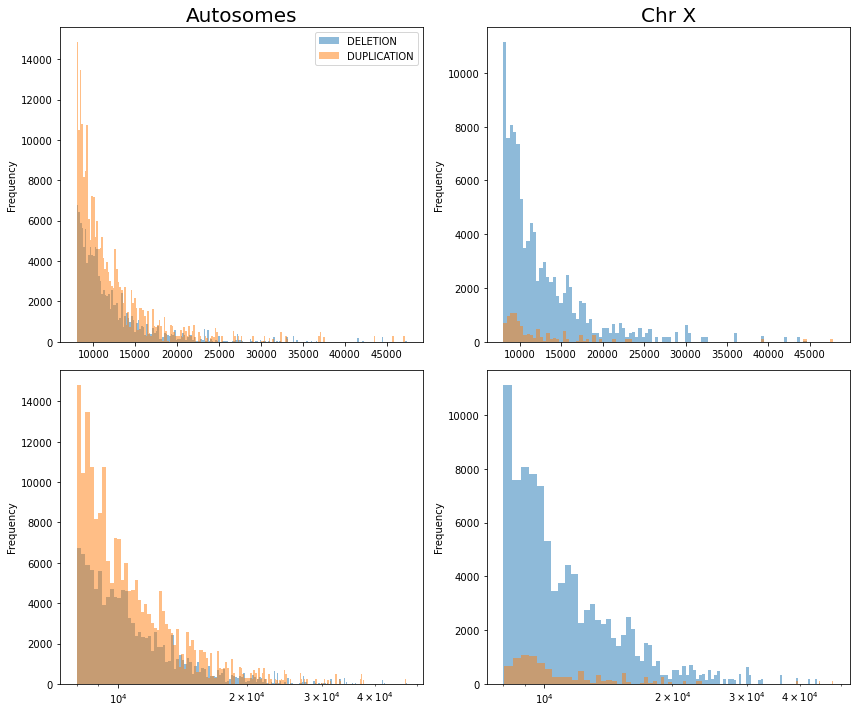

In [7]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('Autosomes', size=20)

df = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('Chr X', size=20)

df = data_x.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df = data_x.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
plt.savefig('../plots/distribution_chm13.png', transparent=True)
plt.show()

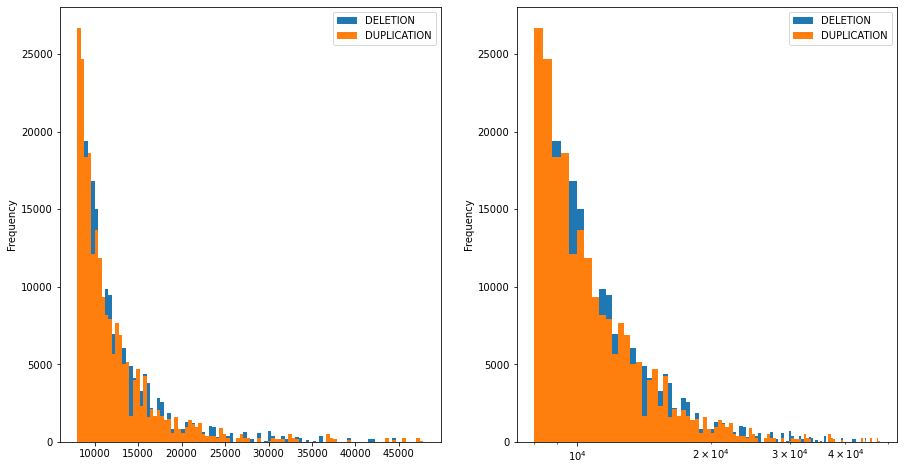

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_plot= distribution.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[0]) # alpha for transparency

plt.xscale('log')
#plt.show()

df_plot = distribution.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[1]) # alpha for transparency

plt.show()

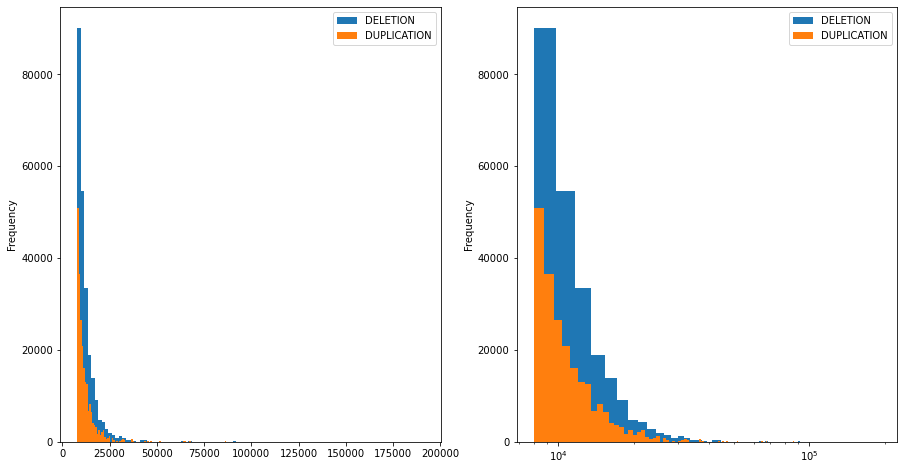

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

df_plot= chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[0]) # alpha for transparency

plt.xscale('log')
#plt.show()

df_plot = chm13.groupby(['TYPE'])['LENGHT']

df_plot.plot(kind='hist',stacked=True, bins=100, legend=True, ax=axs[1]) # alpha for transparency

plt.show()

In [13]:
#subsetting deletions and duplications
deletions = data_no_sex_chr[data_no_sex_chr['TYPE'] =='DELETION']
duplications = data_no_sex_chr[data_no_sex_chr['TYPE'] == 'DUPLICATION']
deletions

SAMPLE CHR      START        END  SCORE      TYPE  LENGHT
330      LP6005441-DNA_B02  22   23929808   23940171      1  DELETION   10363
347      LP6005441-DNA_B02  22   25035009   25045165      1  DELETION   10156
355      LP6005441-DNA_B02  22   25234701   25242766      1  DELETION    8065
365      LP6005441-DNA_B02  22   28411445   28422738      1  DELETION   11293
367      LP6005441-DNA_B02  22   29297270   29307677      1  DELETION   10407
...                    ...  ..        ...        ...    ...       ...     ...
2775614  LP6005442-DNA_H01   1  234771814  234789536      1  DELETION   17722
2775622  LP6005442-DNA_H01   1  234802106  234810374      1  DELETION    8268
2775630  LP6005442-DNA_H01   1  243935252  243966754      1  DELETION   31502
2775637  LP6005442-DNA_H01   1  244219291  244238896      1  DELETION   19605
2775641  LP6005442-DNA_H01   1  246782004  246807658      1  DELETION   25654

[189039 rows x 7 columns]

In [14]:
#change to df when using telomeres and centromeres filtration
final_cnv = deletions.pivot_table(index=["CHR", "START", "END"], 
                    columns='SAMPLE', 
                    values='SCORE').reset_index()


final_cnv = final_cnv.dropna(thresh=30)
final_cnv

SAMPLE CHR      START        END  LP6005441-DNA_A01  LP6005441-DNA_A03  \
0        1     521722     540598                NaN                NaN   
2        1    1041679    1050074                NaN                NaN   
3        1    1199726    1209870                NaN                NaN   
4        1    1382671    1391067                NaN                NaN   
25       1    7779131    7790143                1.0                NaN   
...     ..        ...        ...                ...                ...   
11702    9  146221667  146241455                NaN                NaN   
11704    9  146721079  146732318                NaN                NaN   
11709    9  148863798  148876305                NaN                NaN   
11710    9  149562805  149596639                NaN                1.0   
11719    9  150225245  150233612                NaN                NaN   

SAMPLE  LP6005441-DNA_A04  LP6005441-DNA_A05  LP6005441-DNA_A06  \
0                     NaN                NaN                NaN   
2                     1.0                1.0                NaN   
3                     NaN                NaN                NaN   
4                     NaN                NaN                NaN   
25                    NaN                NaN                NaN   
...                   ...                ...                ...   
11702                 NaN                NaN                NaN   
11704                 NaN                NaN                NaN   
11709                 NaN                NaN                NaN   
11710                 NaN                NaN                NaN   
11719                 1.0                1.0                NaN   

SAMPLE  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  LP6005677-DNA_D03  \
0                     NaN                NaN  ...                1.0   
2                     1.0                NaN  ...                1.0   
3                     NaN                NaN  ...                NaN   
4                     NaN                NaN  ...                NaN   
25                    1.0                1.0  ...                1.0   
...                   ...                ...  ...                ...   
11702                 1.0                NaN  ...                1.0   
11704                 NaN                1.0  ...                NaN   
11709                 NaN                1.0  ...                NaN   
11710                 NaN                NaN  ...                NaN   
11719                 NaN                NaN  ...                1.0   

SAMPLE  LP6005677-DNA_E01  LP6005677-DNA_F01  LP6005677-DNA_G01  \
0                     NaN                NaN                NaN   
2                     NaN                NaN                NaN   
3                     NaN                NaN                NaN   
4                     NaN                1.0                NaN   
25                    NaN                1.0                NaN   
...                   ...                ...                ...   
11702                 NaN                NaN                NaN   
11704                 NaN                NaN                NaN   
11709                 NaN                NaN                NaN   
11710                 NaN                NaN                NaN   
11719                 NaN                NaN                NaN   

SAMPLE  LP6007068-DNA_A01  LP6007069-DNA_A01  SS6004471  SS6004477  SS6004478  \
0                     NaN                NaN        1.0        NaN        1.0   
2                     1.0                1.0        1.0        NaN        NaN   
3                     NaN                NaN        1.0        1.0        NaN   
4                     NaN                NaN        NaN        NaN        NaN   
25                    NaN                NaN        1.0        1.0        1.0   
...                   ...                ...        ...        ...        ...   
11702                 1.0                1.0        NaN        1.0   

In [15]:
from scipy import stats
#final_cnv = final_cnv.iloc[new]
final = final_cnv.iloc[:,3:284]
counts = final
counts = counts.fillna(2)

#counts = counts[counts.columns.intersection(counts_a.columns)]

#counts = counts.drop(columns=['LP6005592-DNA_G03',
#                     'LP6005443-DNA_E10',
#                     'LP6005442-DNA_E04'])

counts = counts.T
counts = counts.sort_index()
counts

0      2      3      4      25     34     35     36     \
SAMPLE                                                                      
LP6005441-DNA_A01    2.0    2.0    2.0    2.0    1.0    2.0    1.0    2.0   
LP6005441-DNA_A03    2.0    2.0    2.0    2.0    2.0    1.0    2.0    2.0   
LP6005441-DNA_A04    2.0    1.0    2.0    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A05    2.0    1.0    2.0    2.0    2.0    2.0    1.0    2.0   
LP6005441-DNA_A06    2.0    2.0    2.0    2.0    2.0    2.0    2.0    2.0   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01    2.0    1.0    2.0    2.0    2.0    2.0    2.0    2.0   
SS6004471            1.0    1.0    1.0    2.0    1.0    2.0    2.0    2.0   
SS6004477            2.0    2.0    1.0    2.0    1.0    2.0    2.0    1.0   
SS6004478            1.0    2.0    2.0    2.0    1.0    1.0    2.0    2.0   
SS6004480            1.0    2.0    2.0    2.0    1.0    2.0    2.0    2.0   

                   39     40     ...  11692  11694  11696  11699  11700  \
SAMPLE                           ...                                      
LP6005441-DNA_A01    1.0    1.0  ...    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A03    2.0    2.0  ...    1.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A04    2.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
LP6005441-DNA_A05    2.0    2.0  ...    2.0    1.0    1.0    2.0    2.0   
LP6005441-DNA_A06    2.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
...                  ...    ...  ...    ...    ...    ...    ...    ...   
LP6007069-DNA_A01    2.0    2.0  ...    1.0    2.0    1.0    2.0    1.0   
SS6004471            1.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   
SS6004477            2.0    2.0  ...    1.0    1.0    2.0    2.0    1.0   
SS6004478            2.0    2.0  ...    2.0    1.0    2.0    2.0    2.0   
SS6004480            1.0    2.0  ...    2.0    2.0    2.0    2.0    2.0   

                   11702  11704  11709  11710  11719  
SAMPLE                                                
LP6005441-DNA_A01    2.0    2.0    2.0    2.0    2.0  
LP6005441-DNA_A03    2.0    2.0    2.0    1.0    2.0  
LP6005441-DNA_A04    2.0    2.0    2.0    2.0    1.0  
LP6005441-DNA_A05    2.0    2.0    2.0    2.0    1.0  
LP6005441-DNA_A06    2.0    2.0    2.0    2.0    2.0  
...                  ...    ...    ...    ...    ...  
LP6007069-DNA_A01    1.0    2.0    1.0    2.0    2.0  
SS6004471            2.0    2.0    2.0    2.0    2.0  
SS6004477            1.0    2.0    1.0    1.0    2.0  
SS6004478            1.0    2.0    2.0    2.0    1.0  
SS6004480            1.0    2.0    1.0    2.0    1.0  

[269 rows x 1676 columns]

In [16]:
features = ids_hg19.set_index('SAMPLE').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['REGION', 'COUNTRY']]
features = features.sort_index()
features 

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

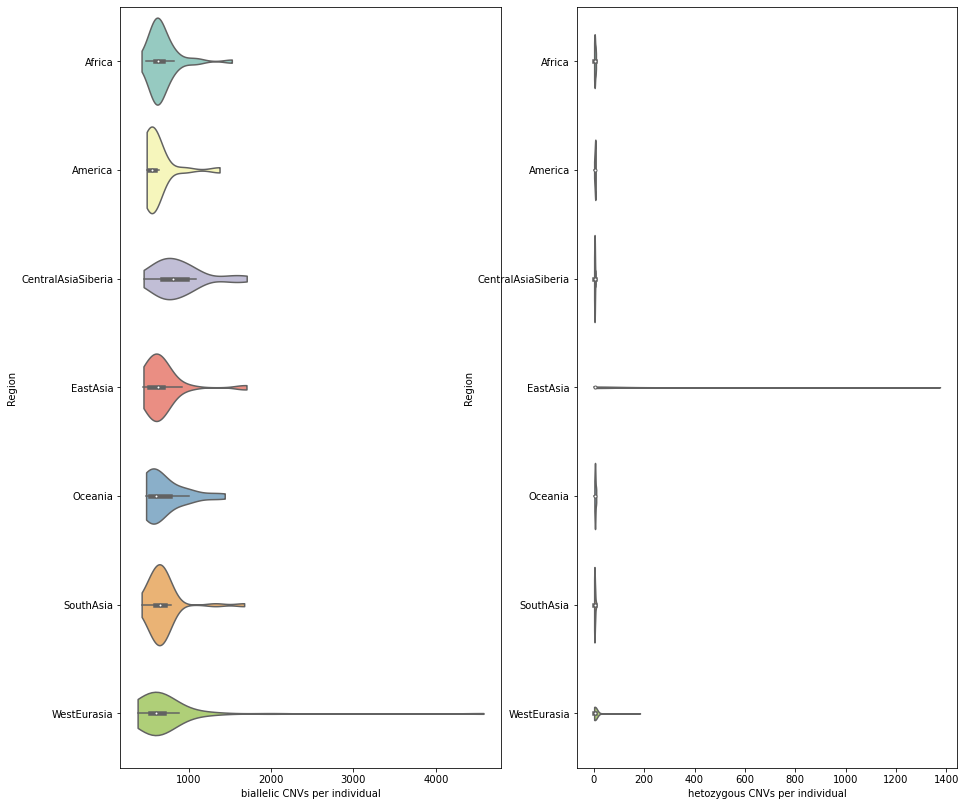

In [17]:
#import seaborn as sns

#pd.set_option("display.max_rows", None, "display.max_columns", None)
biallelic_deletions = deletions[deletions['SCORE'] < 2 ] 
biallelic_deletions = biallelic_deletions.groupby('SAMPLE').size()

biallelic_deletions = pd.DataFrame(biallelic_deletions)
#biallelic_deletions = biallelic_deletions.set_index('SAMPLE')

biallelic_deletions = features.merge(biallelic_deletions, left_index=True, right_index=True)
#biallelic_deletions = biallelic_deletions.reset_index()

#heterozygous_deletions.value_counts('SAMPLE').sort_index()
biallelic_deletions.columns = ['REGION', 'COUNTRY','TYPE']
biallelic_deletions


#pd.set_option("display.max_rows", None, "display.max_columns", None)
heterozygous_deletions = deletions[deletions['SCORE'] < 1] 
heterozygous_deletions = heterozygous_deletions.groupby('SAMPLE').size()
heterozygous_deletions = pd.DataFrame(heterozygous_deletions)
heterozygous_deletions = features.merge(heterozygous_deletions, left_index=True, right_index=True)
heterozygous_deletions.columns = ['REGION','COUNTRY', 'TYPE']
heterozygous_deletions
heterozygous_deletions


fig, axs = plt.subplots(1, 2, figsize=(15, 14))

ax = seaborn.violinplot(x="TYPE", y="REGION", data=biallelic_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[0], cut=0)

ax.set_xlabel("biallelic CNVs per individual")
ax.set_ylabel("Region")

ax = seaborn.violinplot(x="TYPE", y="REGION", data=heterozygous_deletions, palette='Set3', order=[ "Africa","America", "CentralAsiaSiberia","EastAsia", "Oceania", "SouthAsia", "WestEurasia"], ax=axs[1], cut=0)

ax.set_xlabel("hetozygous CNVs per individual")
ax.set_ylabel("Region")
plt.show()

In [18]:
#track features for pca & tsne
from sklearn import preprocessing

X =preprocessing.scale(counts)

#PCA
pca = PCA(n_components=10)
pca_results = pca.fit_transform(X)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

REGION           COUNTRY  component_1  component_2  \
SAMPLE                                                                       
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)    -5.076281     1.412049   
LP6005441-DNA_A03      Oceania    PapuaNewGuinea     3.533698     2.880436   
LP6005441-DNA_A04      America          Colombia    -6.958672     1.062650   
LP6005441-DNA_A05  WestEurasia            France   -12.440000    -3.034234   
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)   -13.577663    -0.479640   
...                        ...               ...          ...          ...   
LP6007069-DNA_A01  WestEurasia            Greece    13.048532    -1.459325   
SS6004471               Africa             Congo     9.745159    11.652244   
SS6004477              Oceania         Australia    15.026447     9.552124   
SS6004478              Oceania         Australia    11.721386     6.365379   
SS6004480               Africa             Sudan     1.775936    -2.006379   

                   component_3  component_4  component_5  component_6  \
SAMPLE                                                                  
LP6005441-DNA_A01    -1.868729    -2.977293    -1.195230    -3.348278   
LP6005441-DNA_A03    -1.719002    -6.966205    -2.270954    -0.162193   
LP6005441-DNA_A04    -0.603287    -3.324771    -0.288280    -1.675366   
LP6005441-DNA_A05    -3.039510     0.768102     4.337095     2.257172   
LP6005441-DNA_A06    -1.619479     0.452503     1.319617     1.280975   
...                        ...          ...          ...          ...   
LP6007069-DNA_A01    26.471946     8.619882    -0.165058     1.473624   
SS6004471            32.925220     4.565454     0.669391     1.520264   
SS6004477            27.555867     4.148653    -3.930670    -0.488451   
SS6004478            28.814651     5.371743    -3.384649     4.012818   
SS6004480            22.776091     5.317540     3.596585     3.406490   

                   component_7  component_8  component_9  component_10  
SAMPLE                                                                  
LP6005441-DNA_A01     1.274770    -3.145170    -2.324771      5.425117  
LP6005441-DNA_A03    -0.931796    -1.113590    -0.519036      5.988376  
LP6005441-DNA_A04     1.207404    -0.617359    -1.096876      2.076222  
LP6005441-DNA_A05     1.555224    -2.000560    -4.249912      1.004484  
LP6005441-DNA_A06     0.836074    -1.647376    -1.687296     -0.736021  
...                        ...          ...          ...           ...  
LP6007069-DNA_A01     6.383003     0.370268    -3.346976      3.336701  
SS6004471            -0.898333    -4.548674     3.112695     -0.174395  
SS6004477            -0.890651    -1.573443    -0.747293      3.588899  
SS6004478            -0.738968    -3.242937    -2.305469      8.511978  
SS6004480            14.242217     1.101505    -4.610831      0.945756  

[269 rows x 12 columns]

In [19]:
pca.explained_variance_ratio_

array([0.07044299, 0.01731333, 0.01513793, 0.01195555, 0.01142357,
       0.00846842, 0.00790288, 0.00765063, 0.00717903, 0.00669752])

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  component_5  component_6  component_7

                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  component_5  component_6  component_7

[269 rows x 11 columns]
Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

          

Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  componen

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/pca_plot.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  tight_layout=True


                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  component_5  component_6  component_7

Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  componen

Count of groups by factor: 7
                      COUNTRY  component_1  component_2  component_3  \
REGION                                                                 
WestEurasia  Russia(Caucasus)    -5.076281     1.412049    -1.868729   
Oceania        PapuaNewGuinea     3.533698     2.880436    -1.719002   
America              Colombia    -6.958672     1.062650    -0.603287   
WestEurasia            France   -12.440000    -3.034234    -3.039510   
WestEurasia    Italy(Bergamo)   -13.577663    -0.479640    -1.619479   
...                       ...          ...          ...          ...   
WestEurasia            Greece    13.048532    -1.459325    26.471946   
Africa                  Congo     9.745159    11.652244    32.925220   
Oceania             Australia    15.026447     9.552124    27.555867   
Oceania             Australia    11.721386     6.365379    28.814651   
Africa                  Sudan     1.775936    -2.006379    22.776091   

             component_4  componen

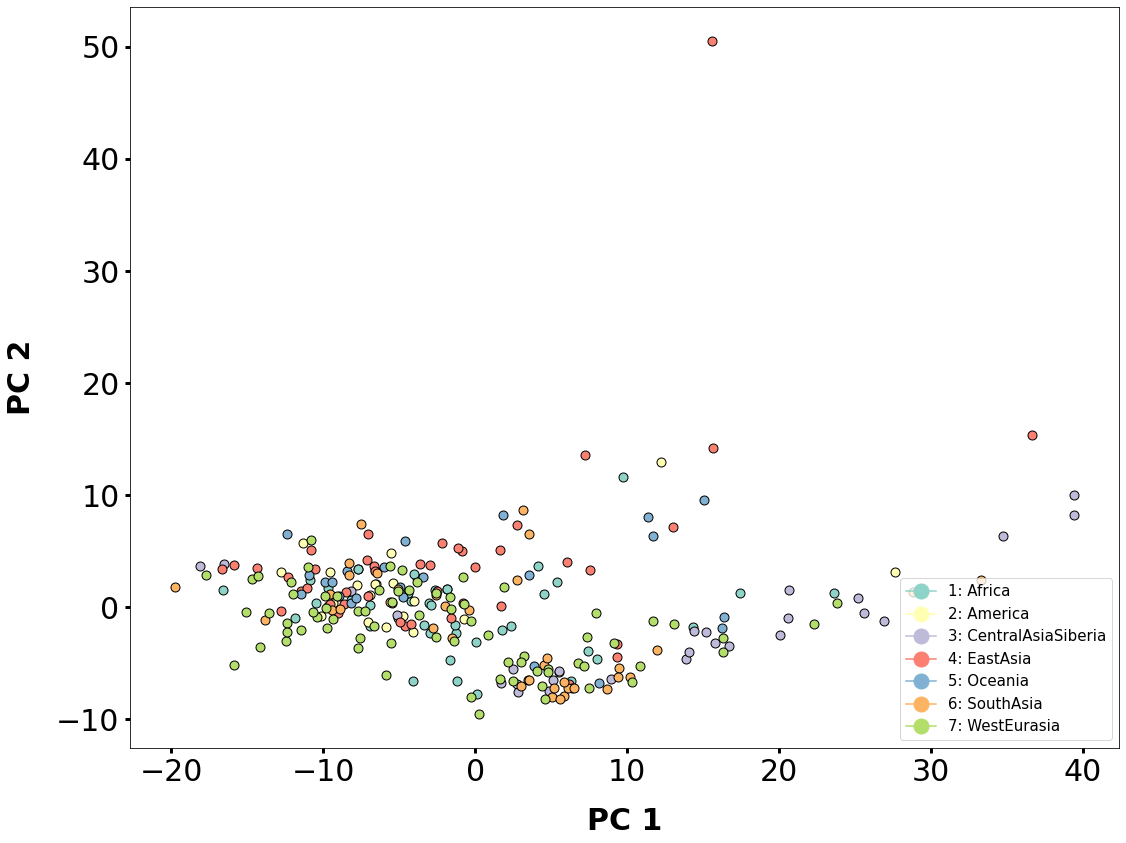

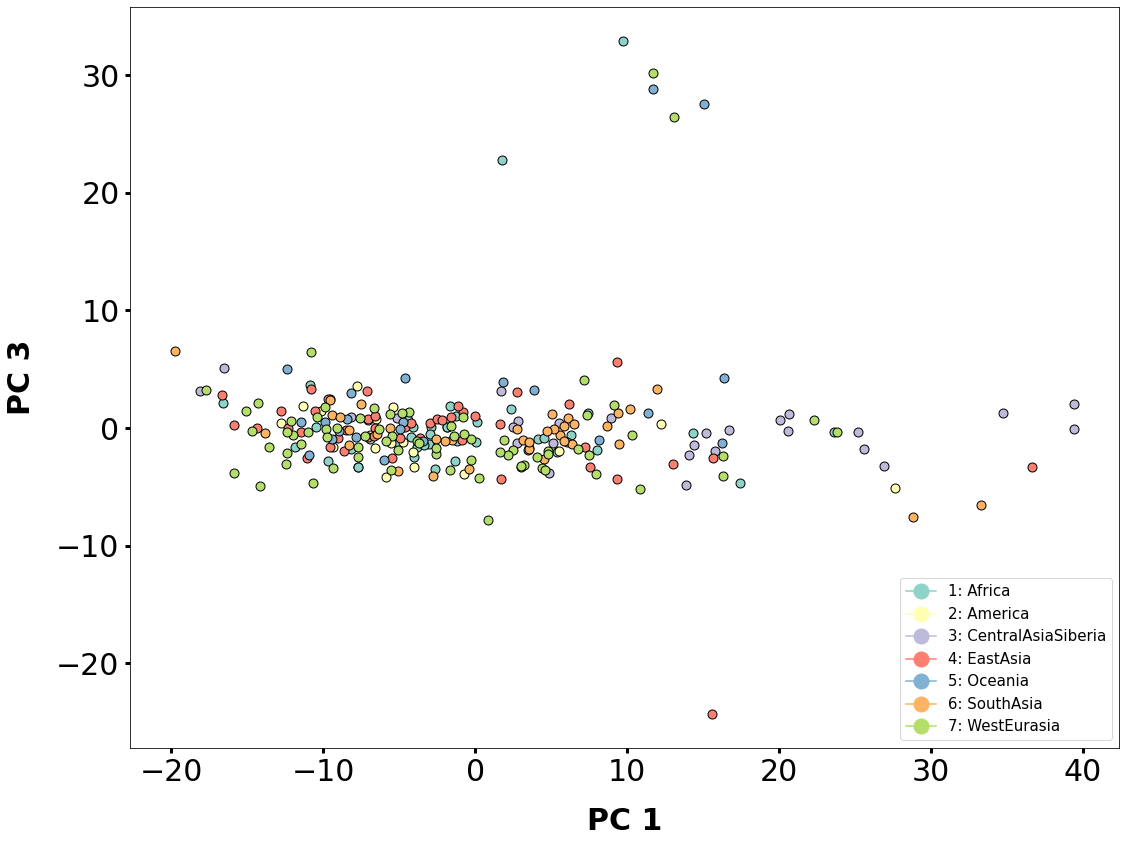

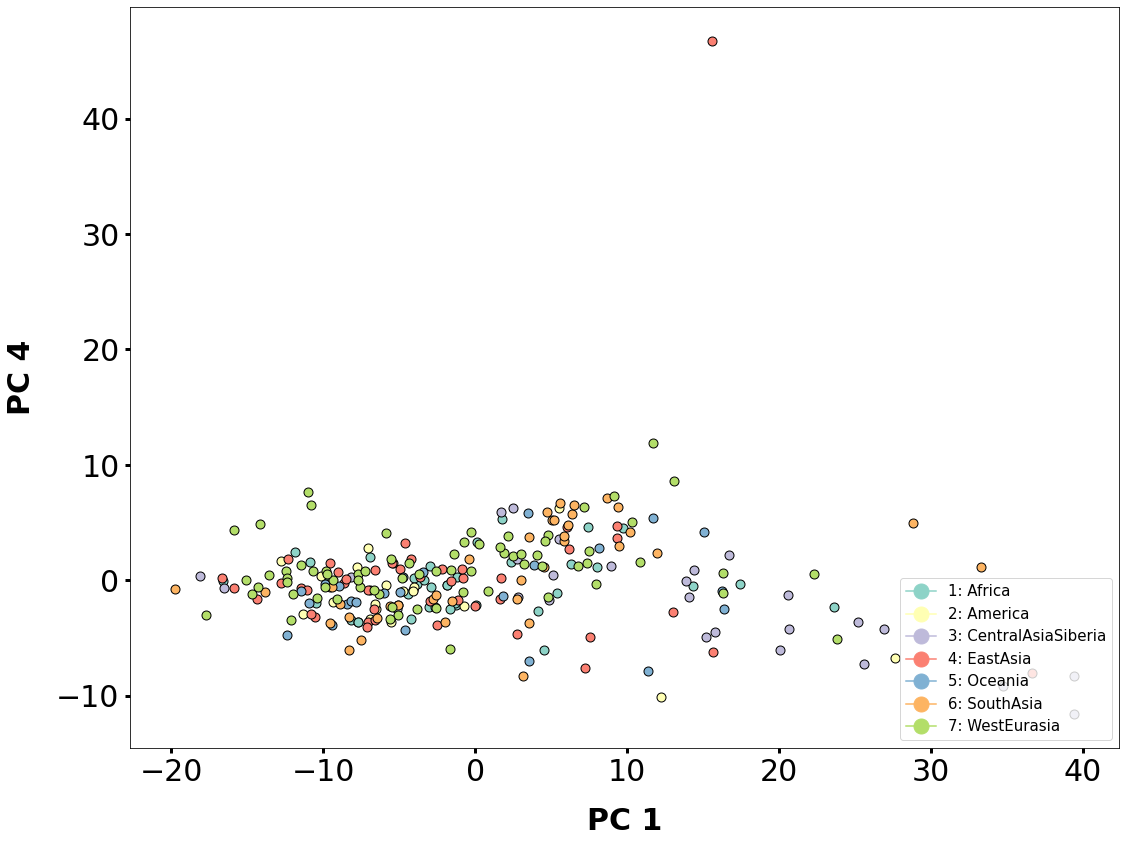

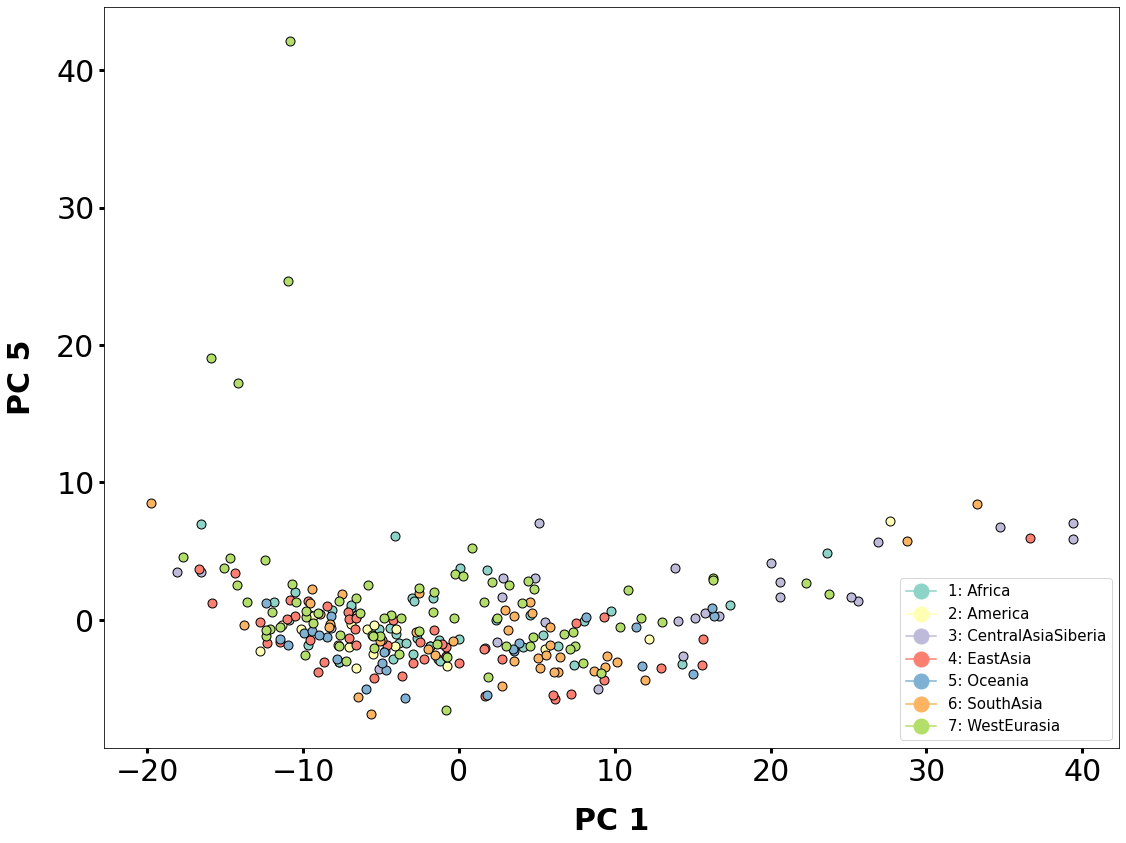

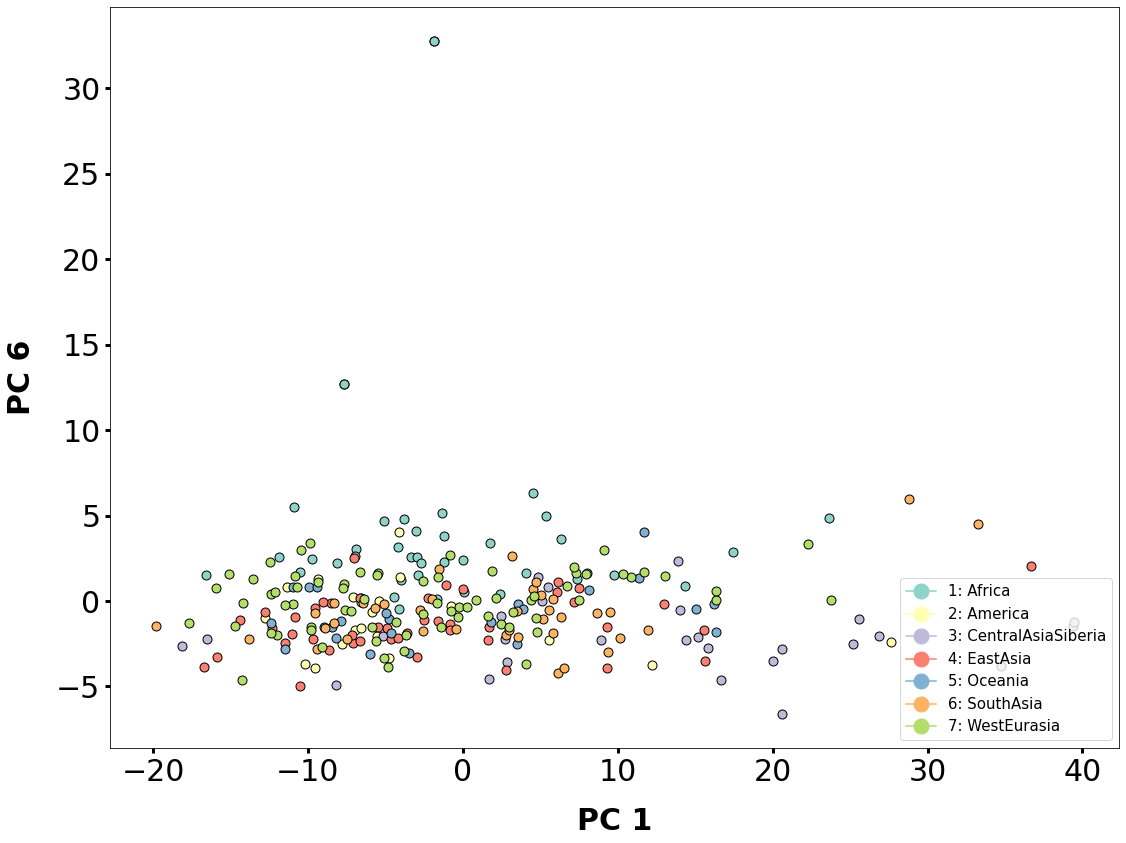

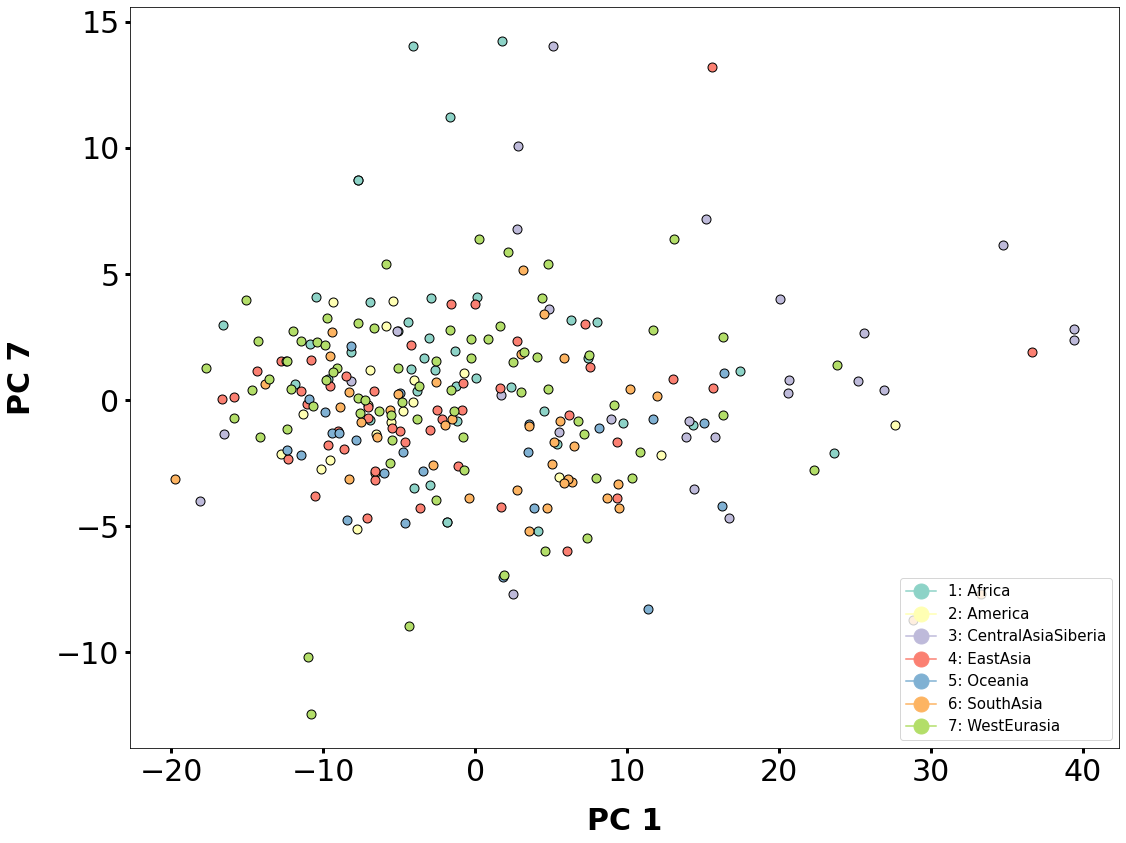

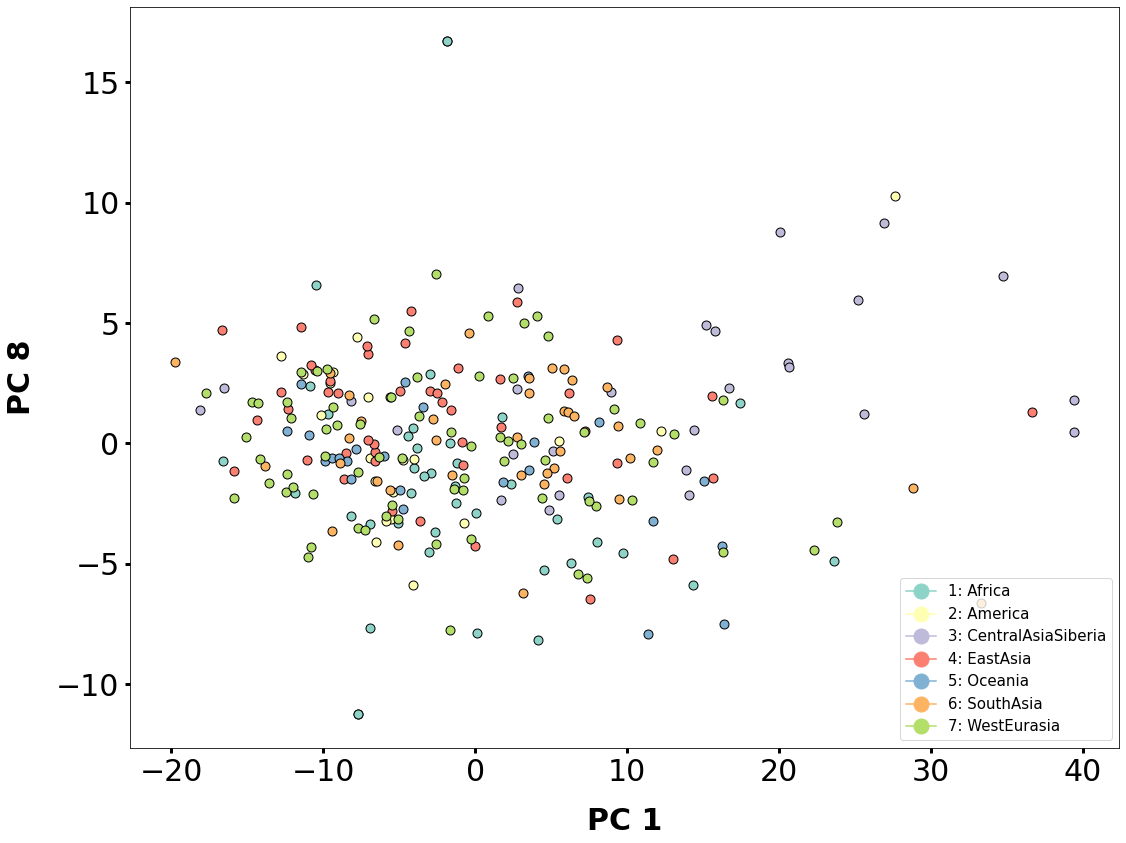

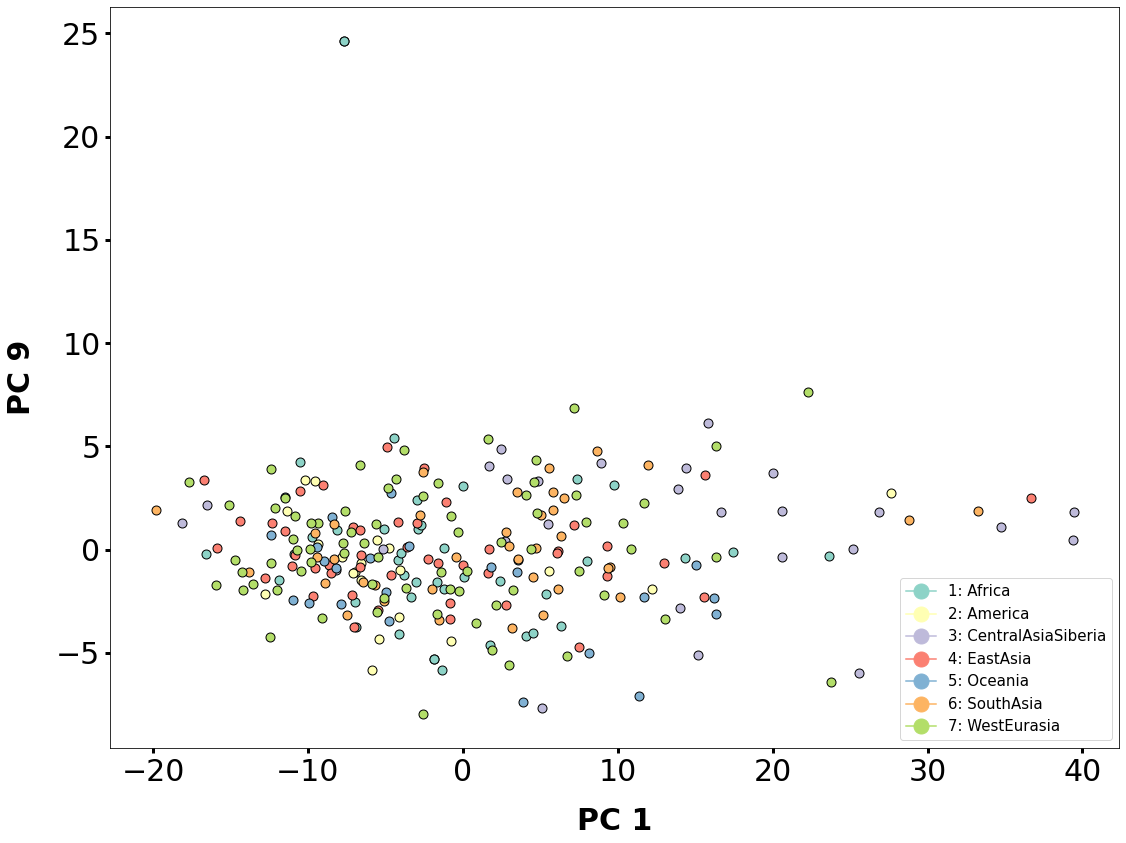

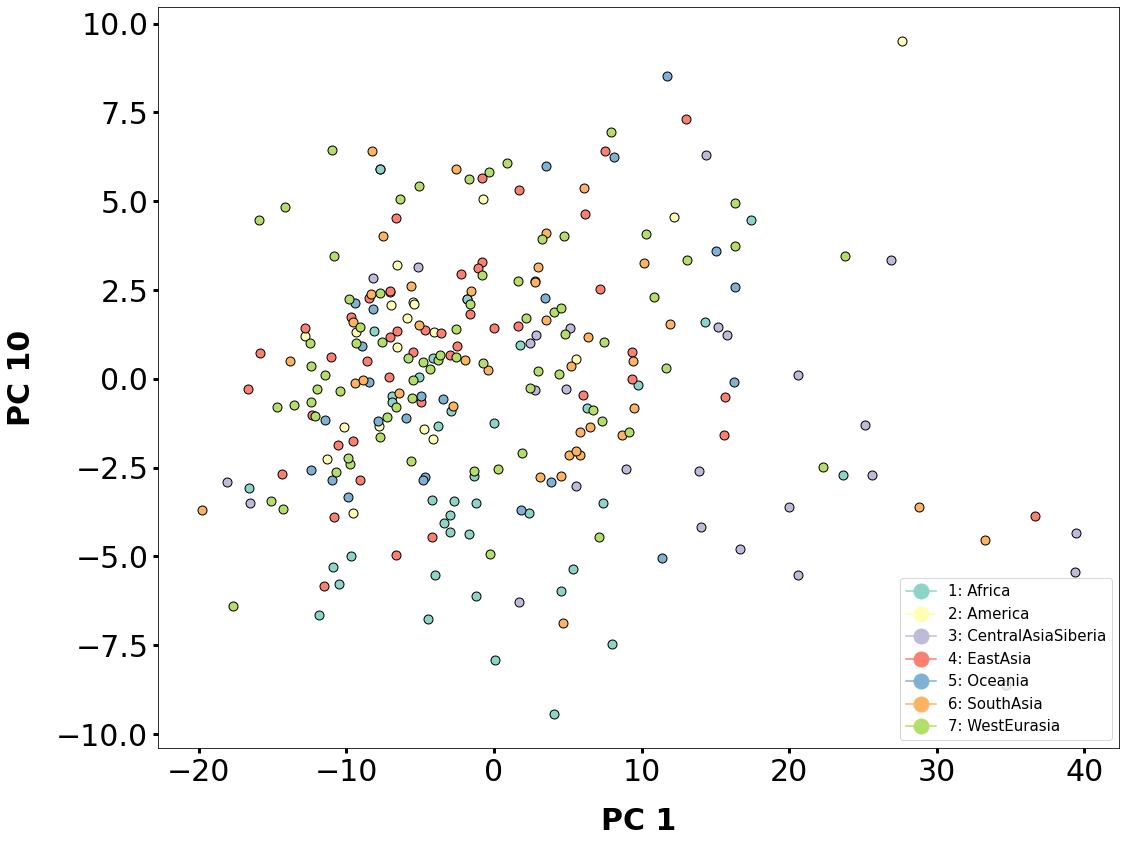

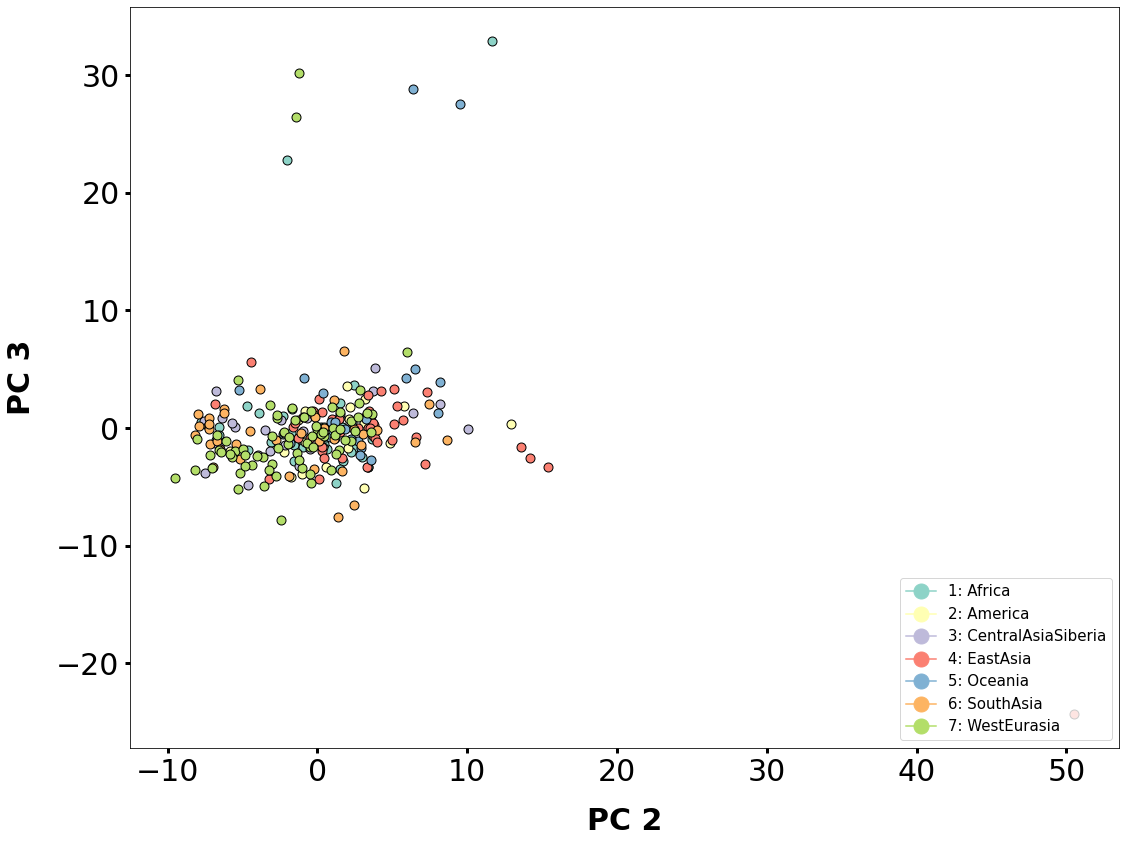

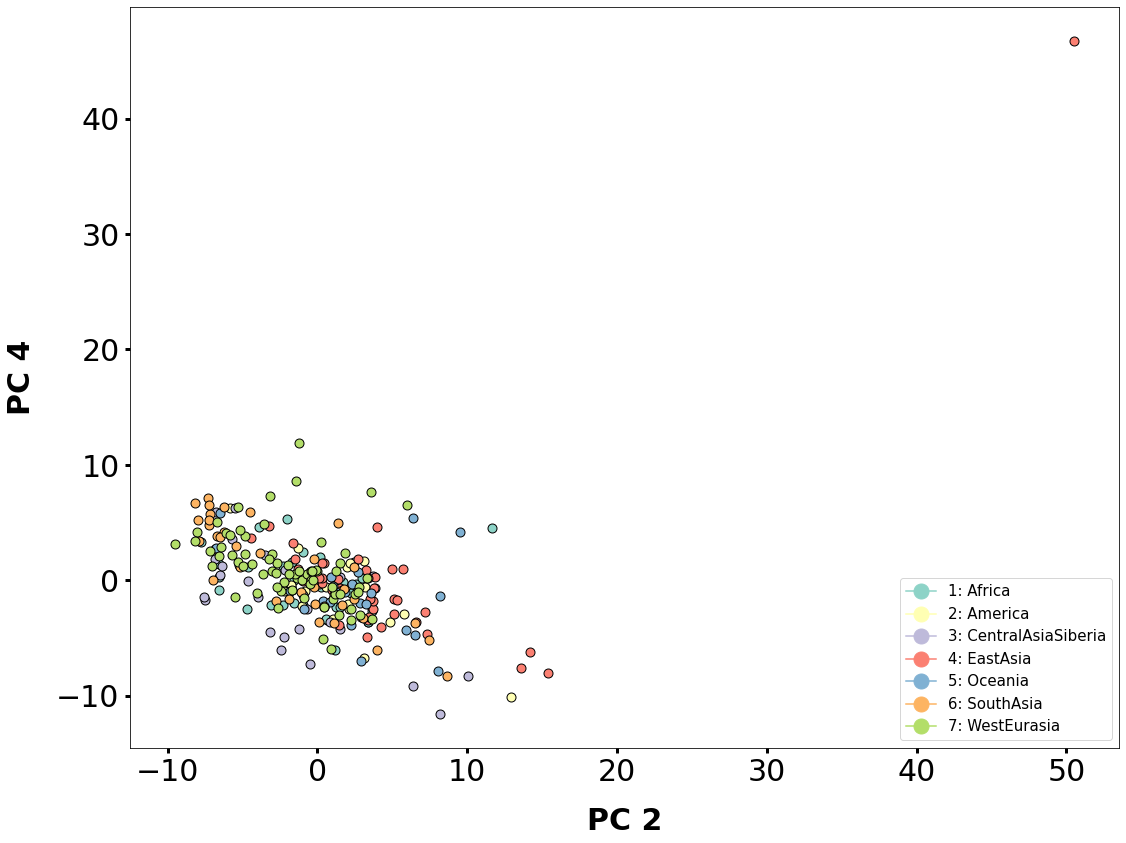

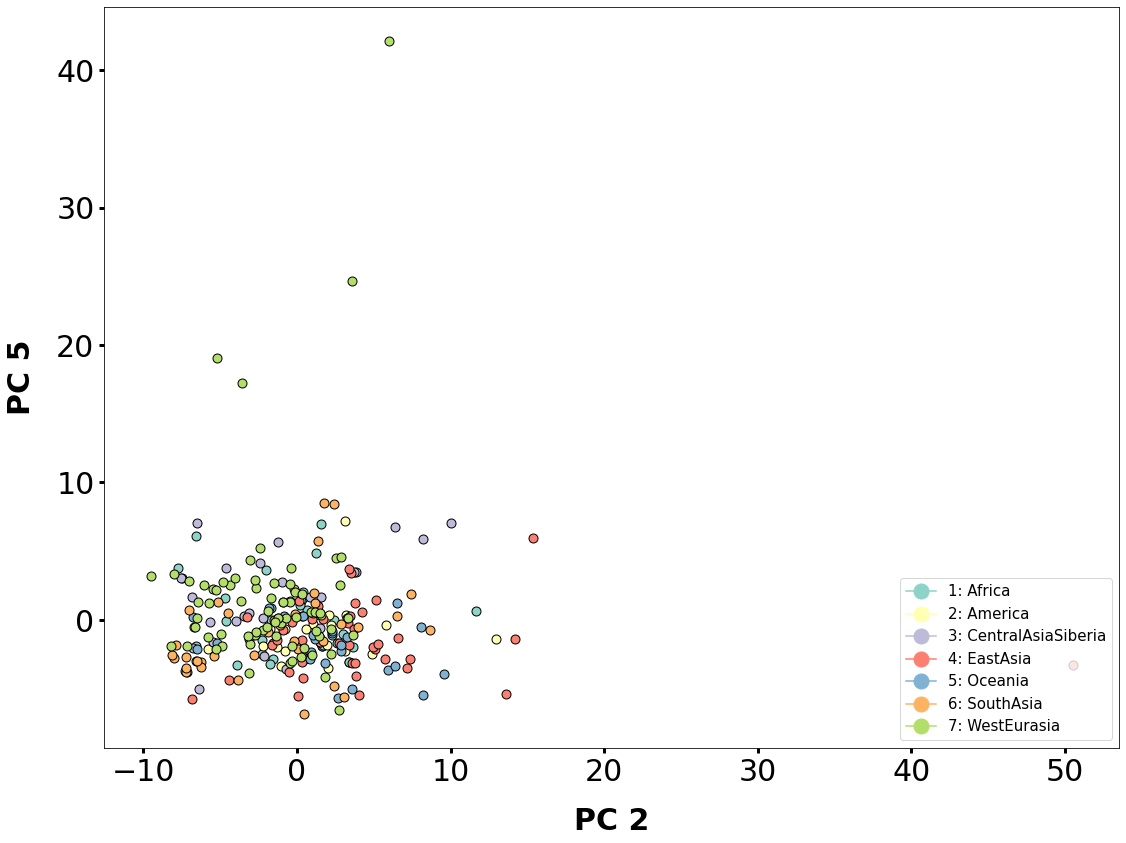

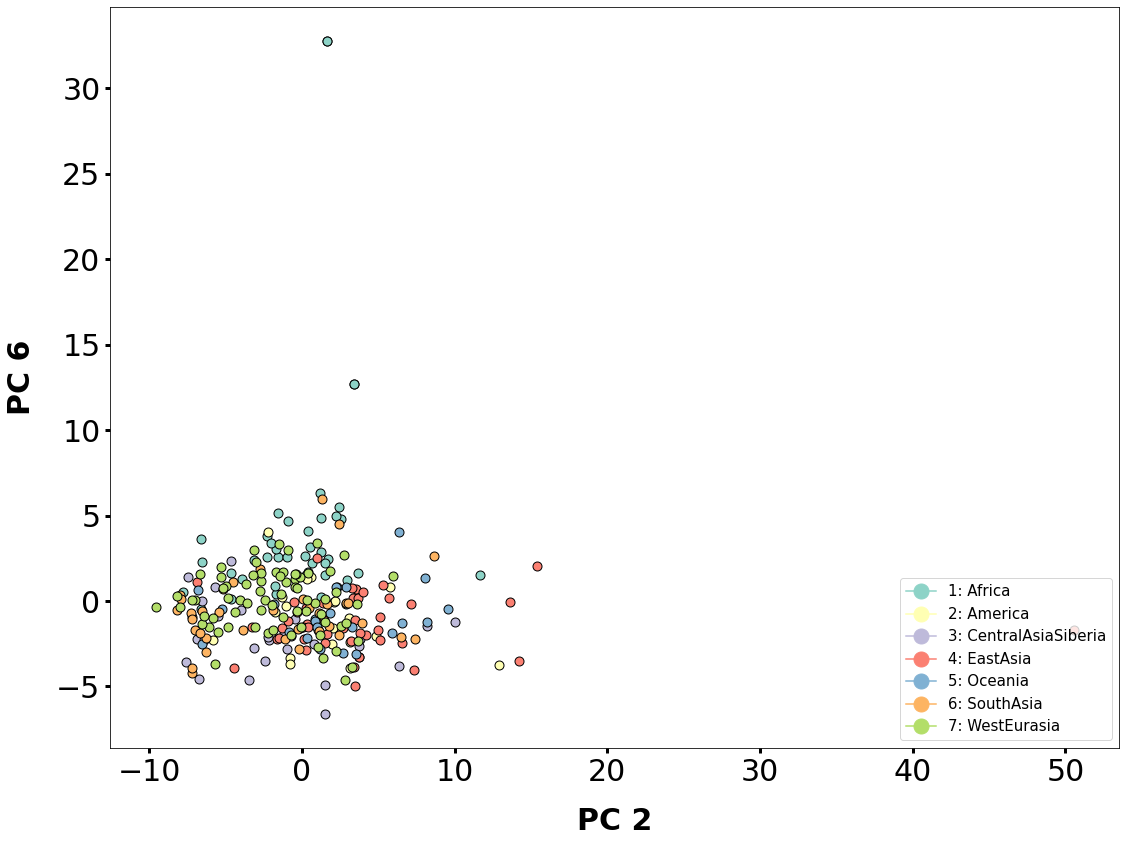

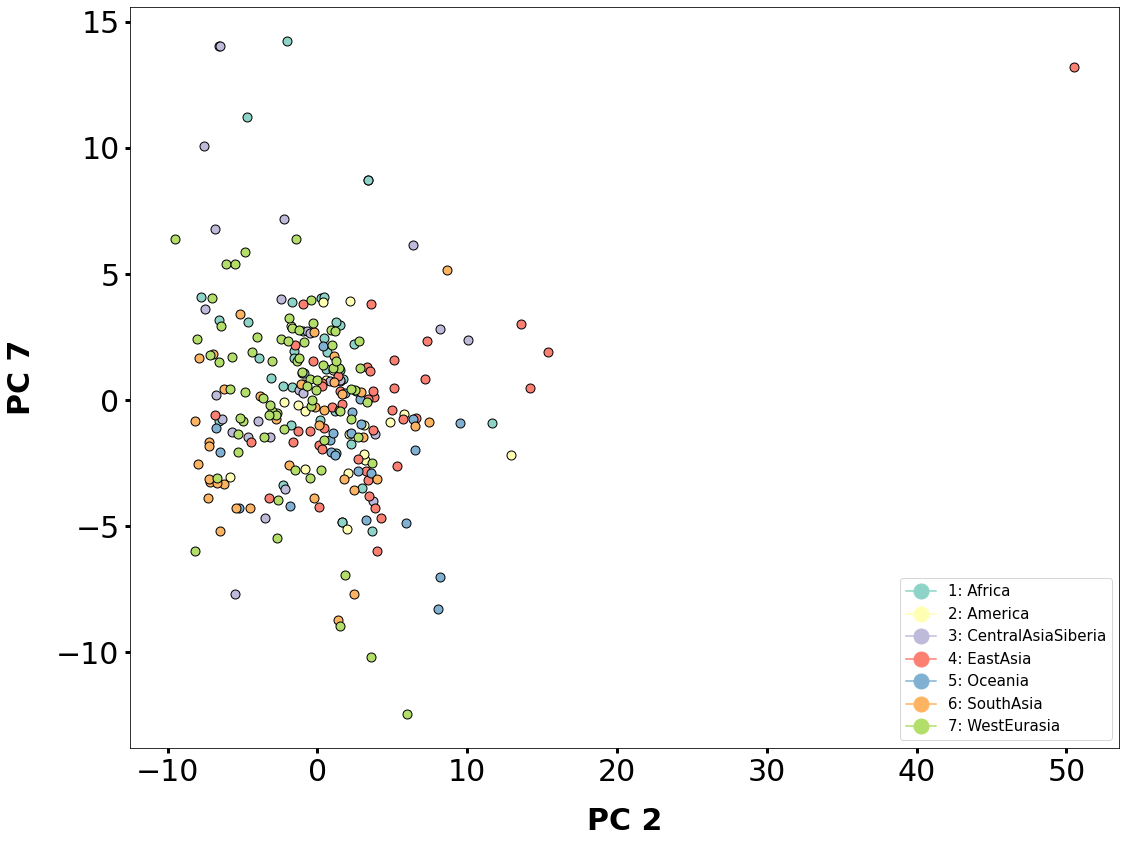

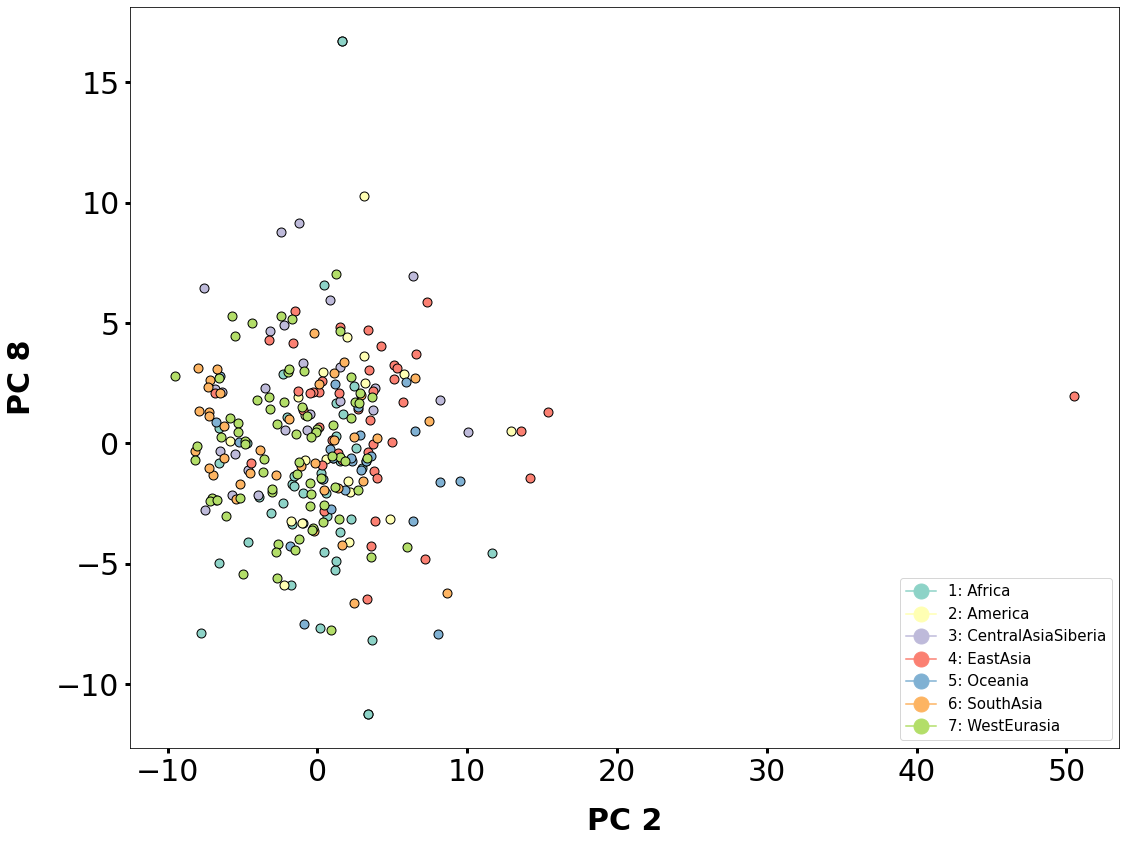

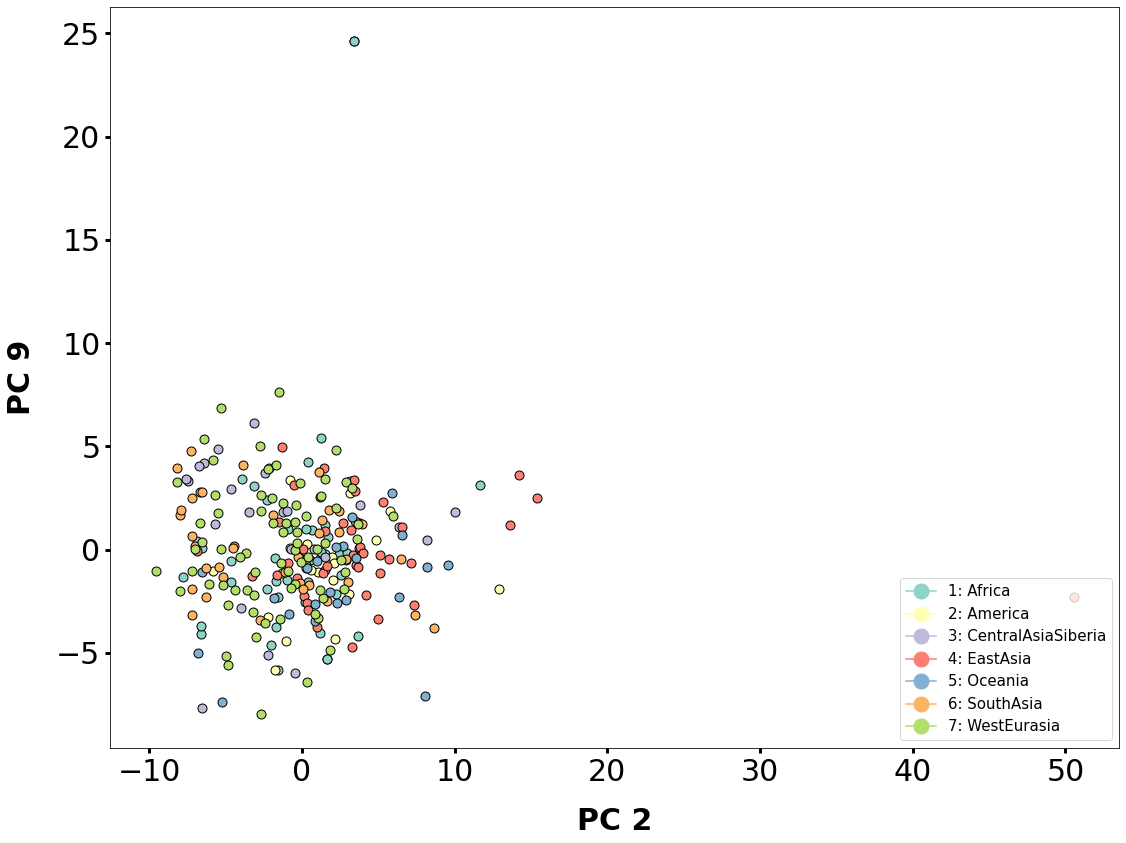

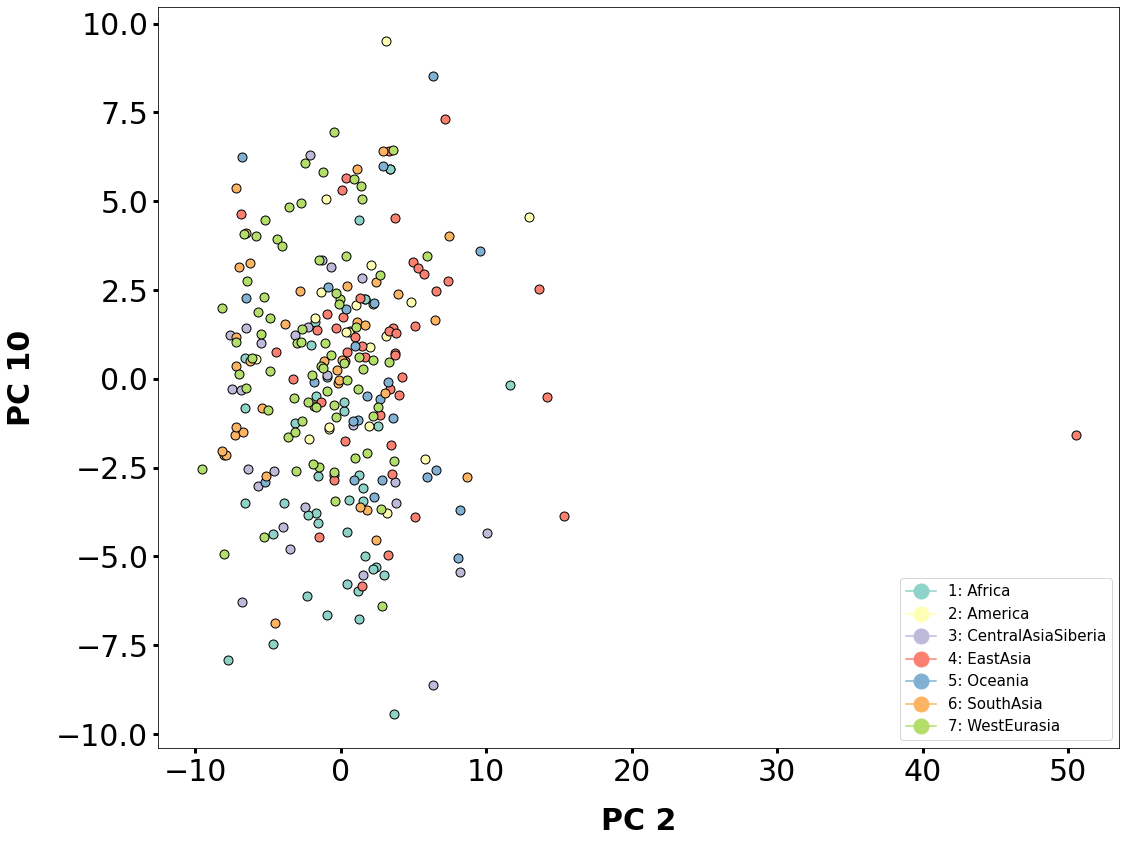

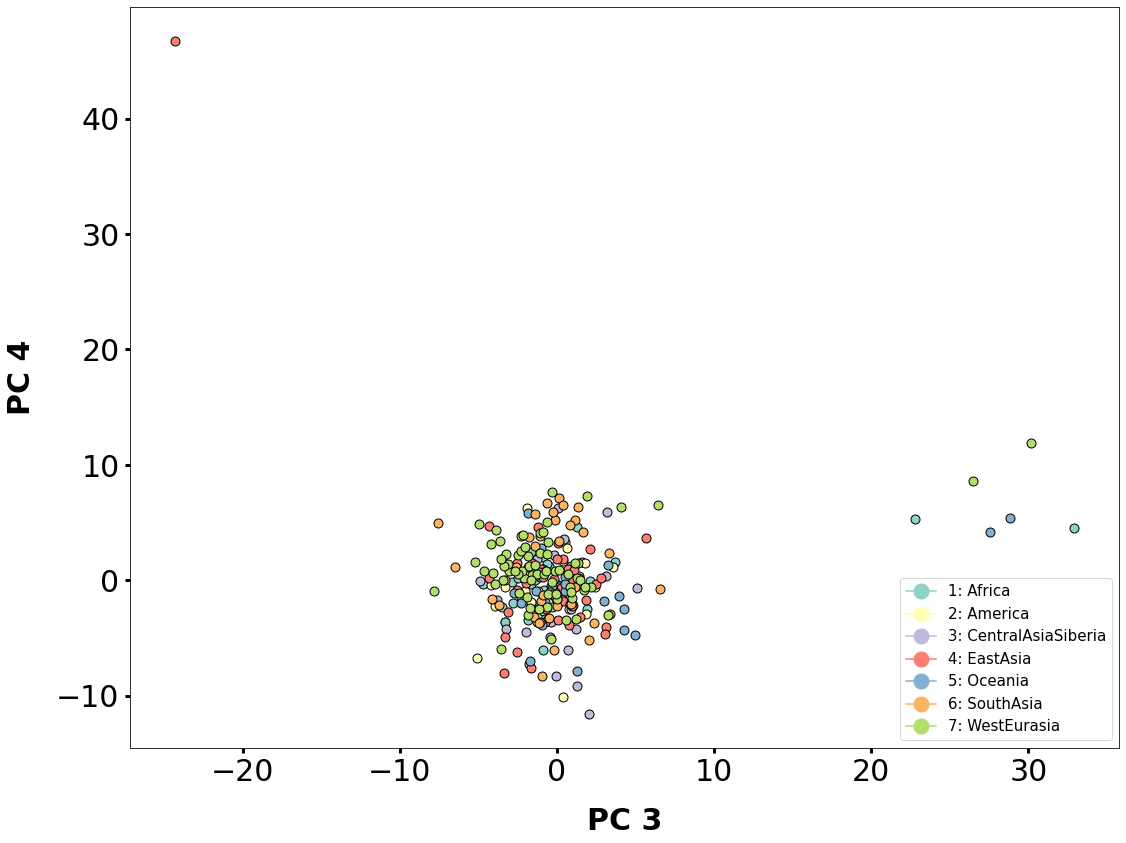

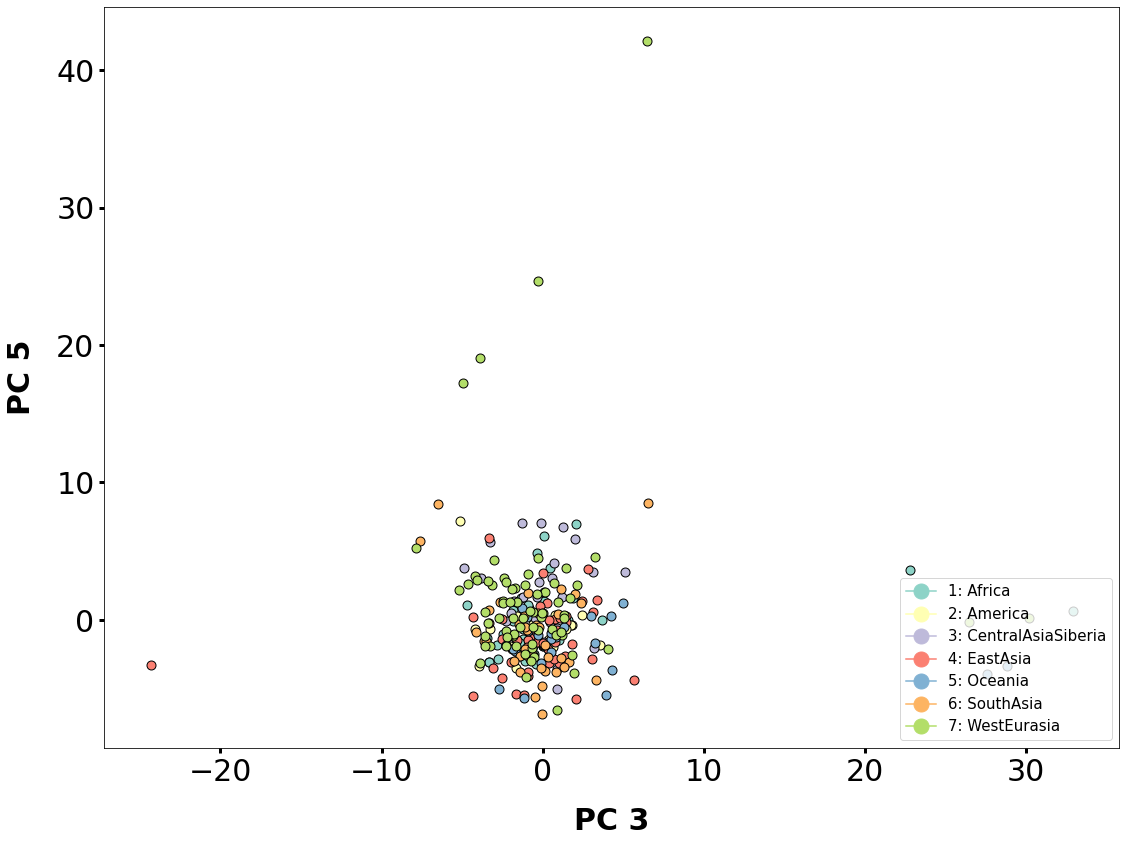

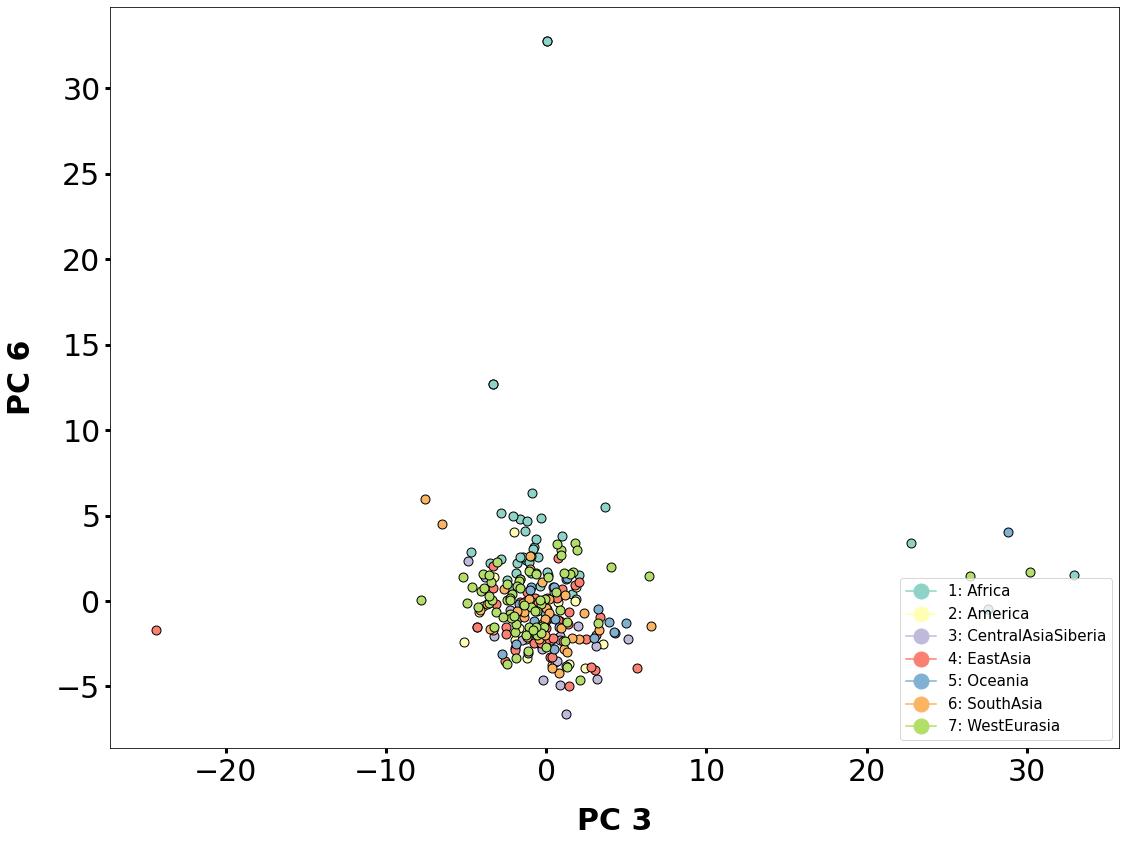

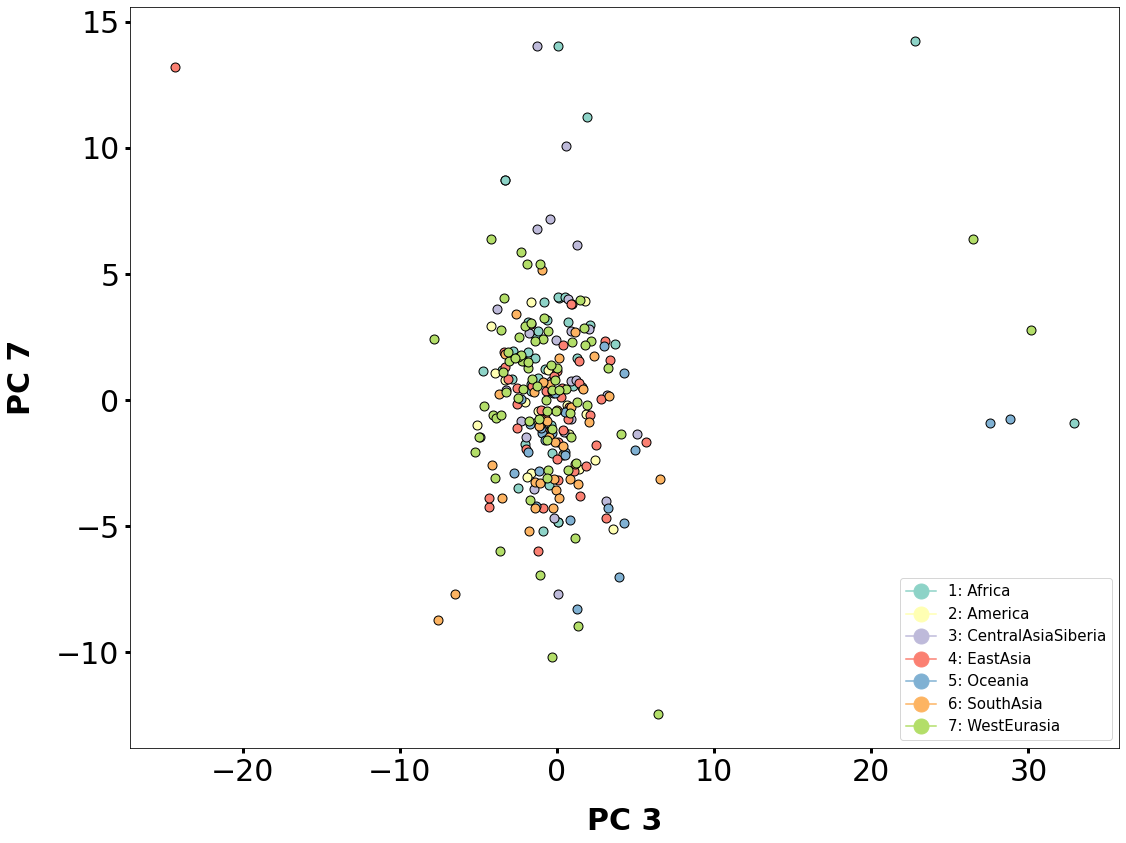

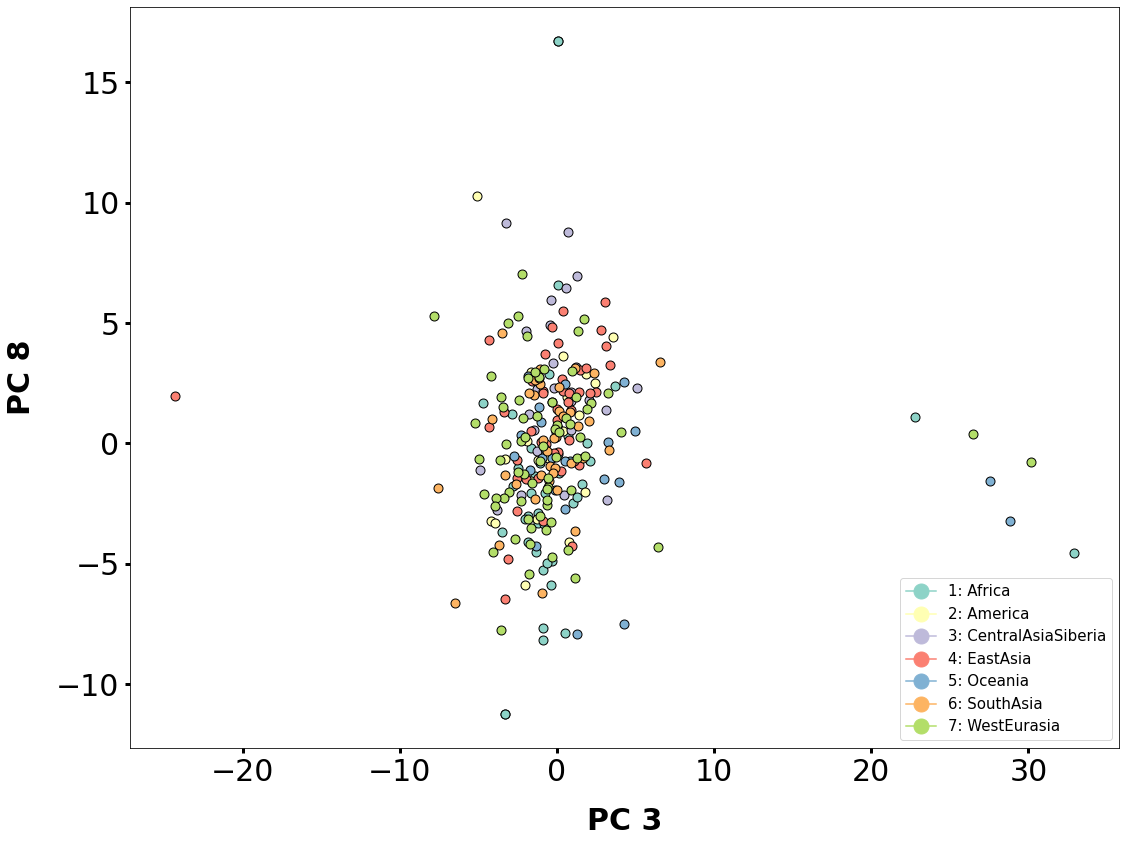

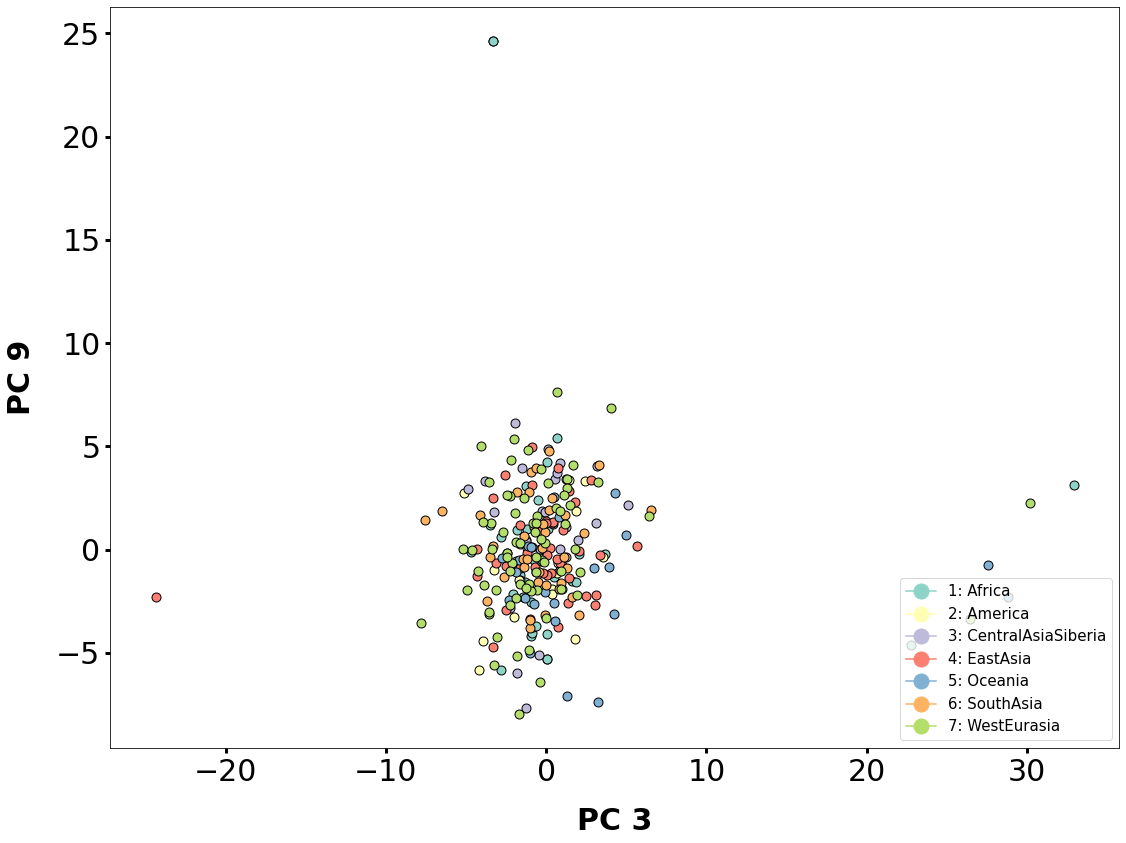

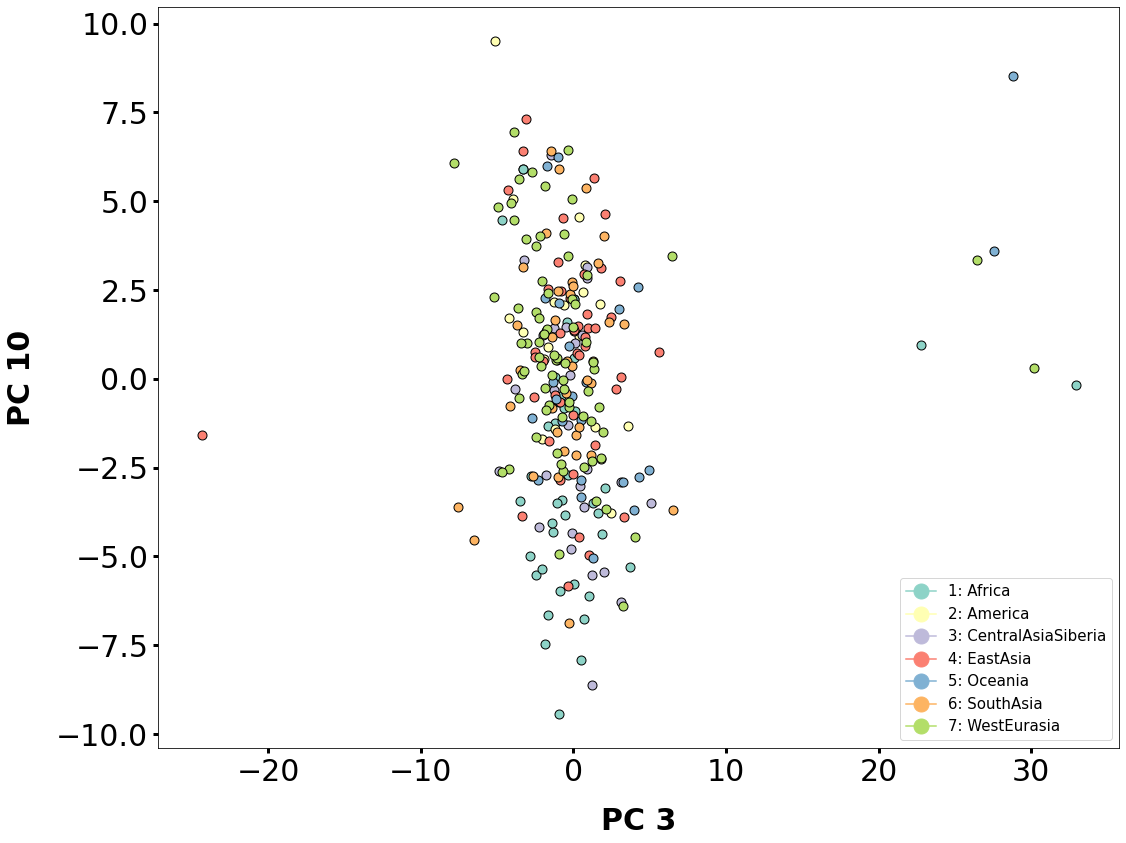

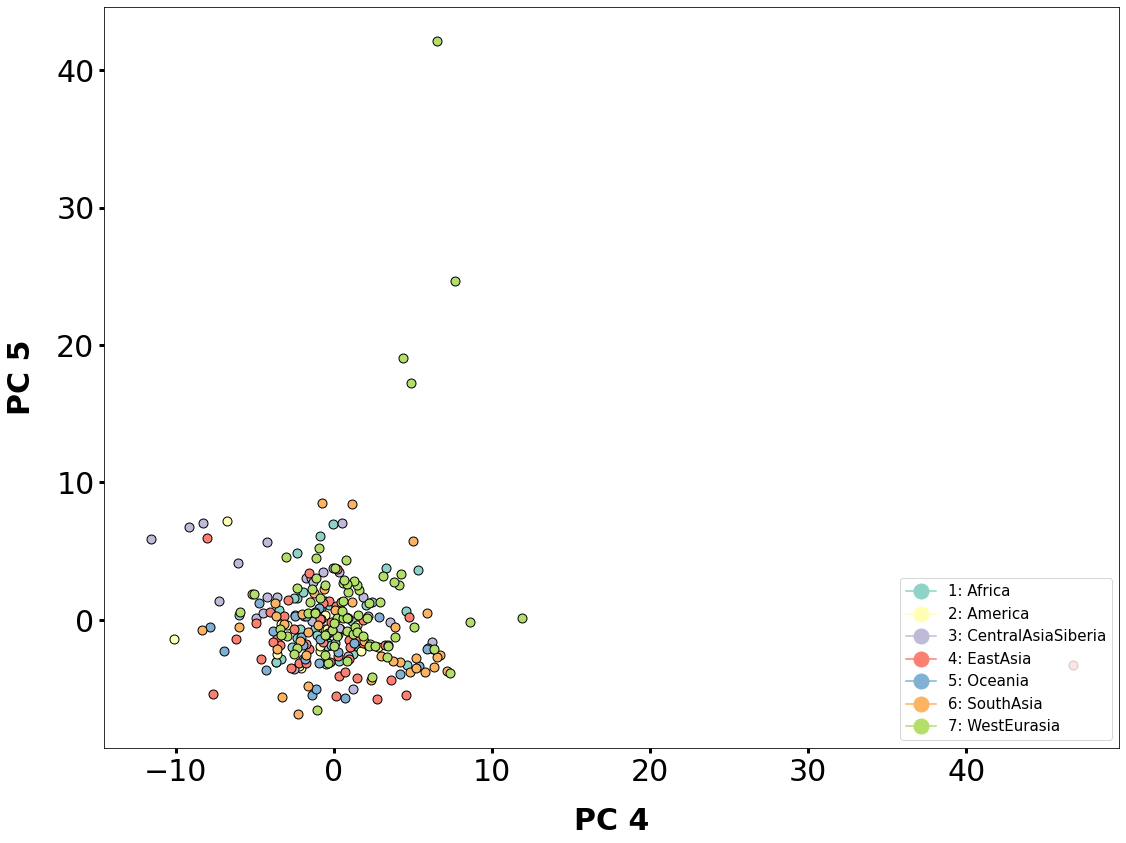

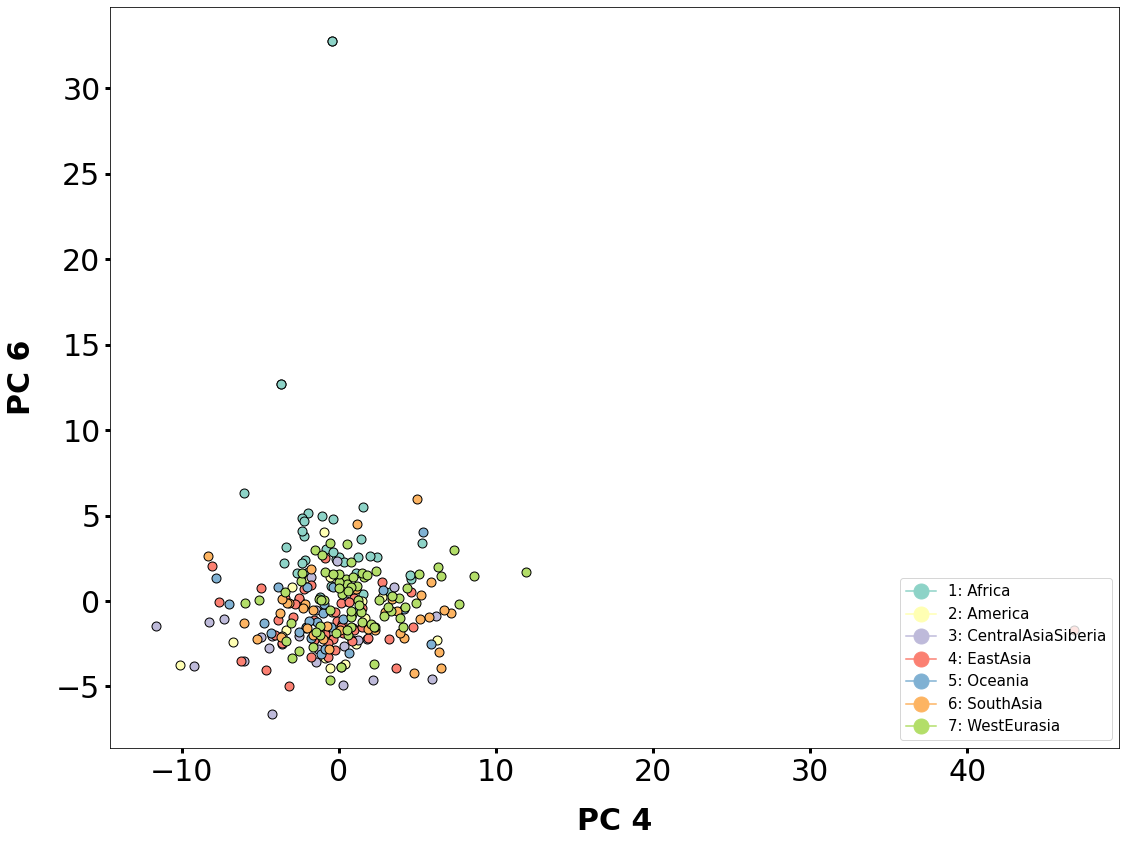

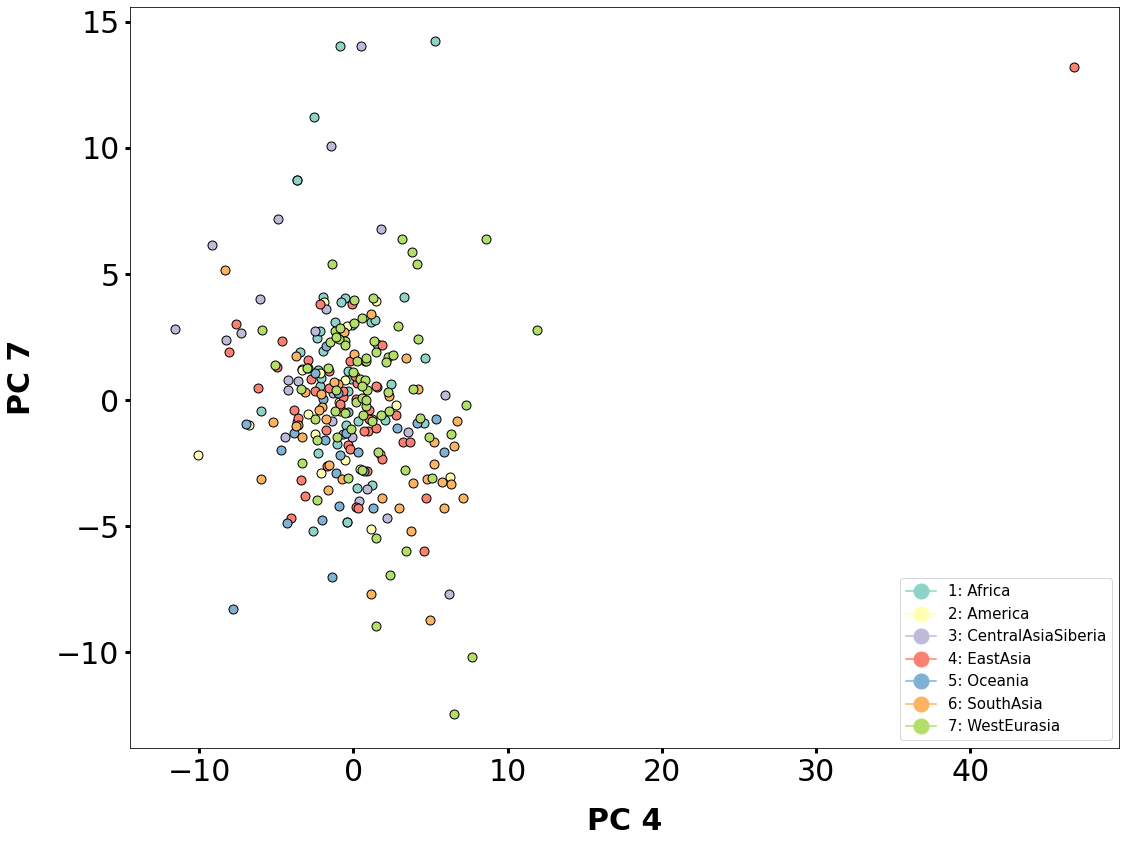

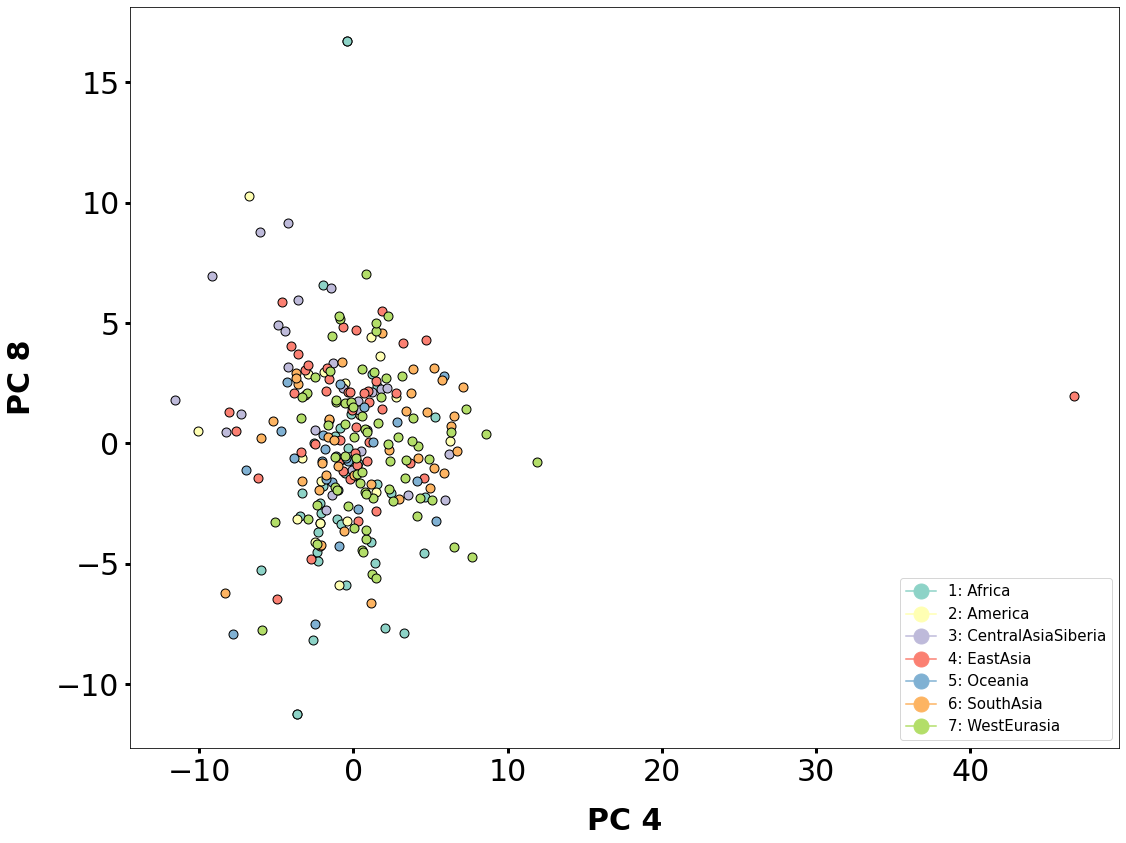

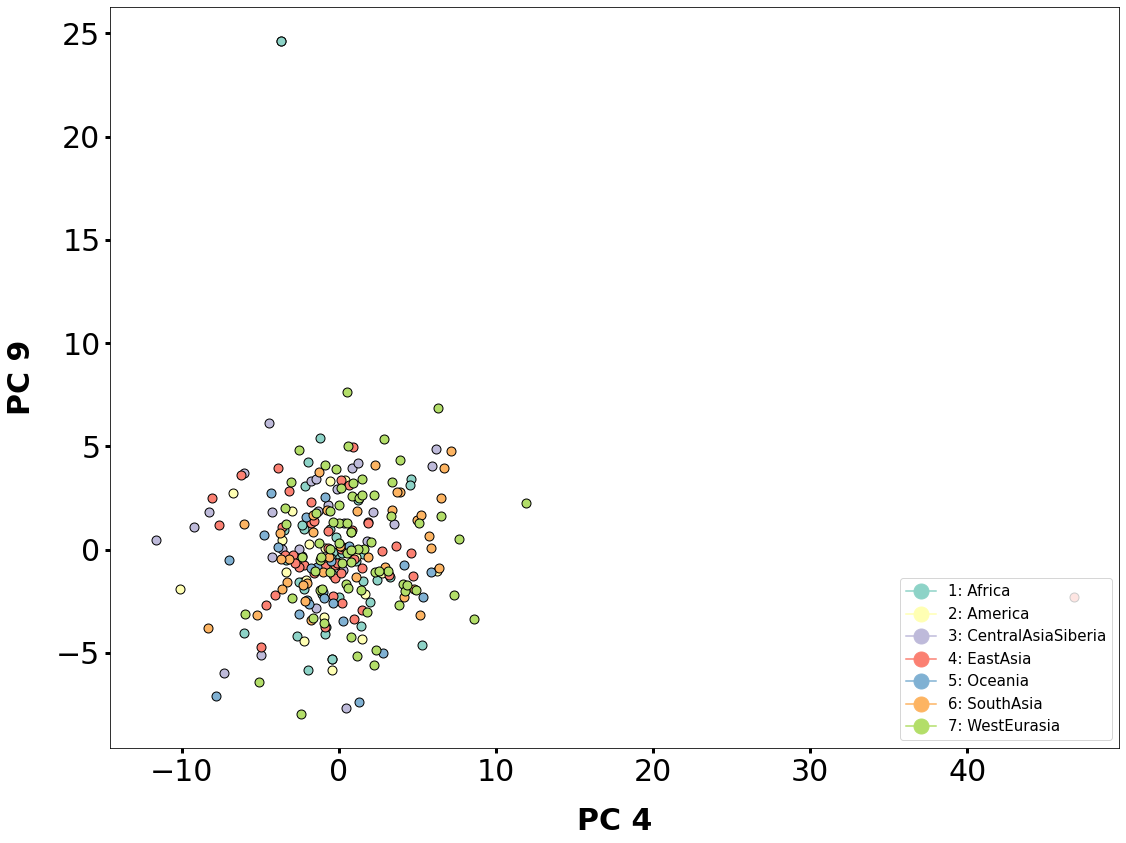

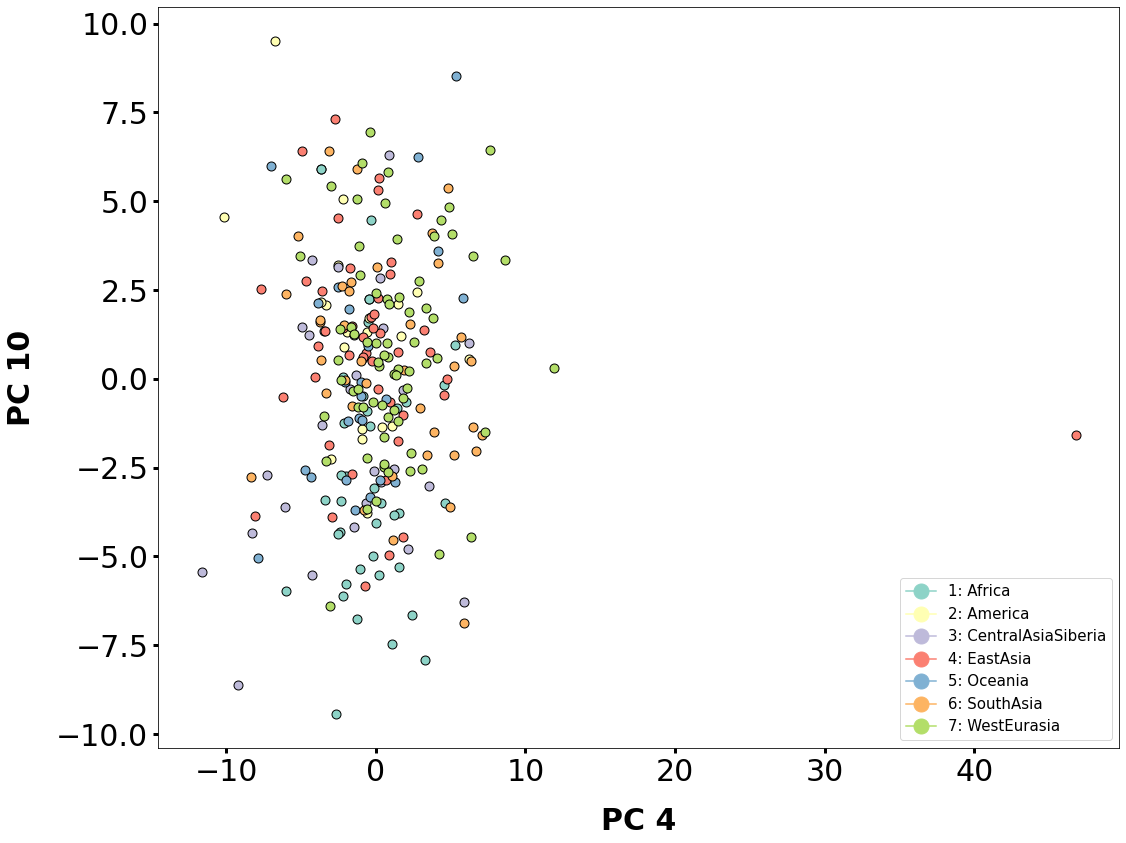

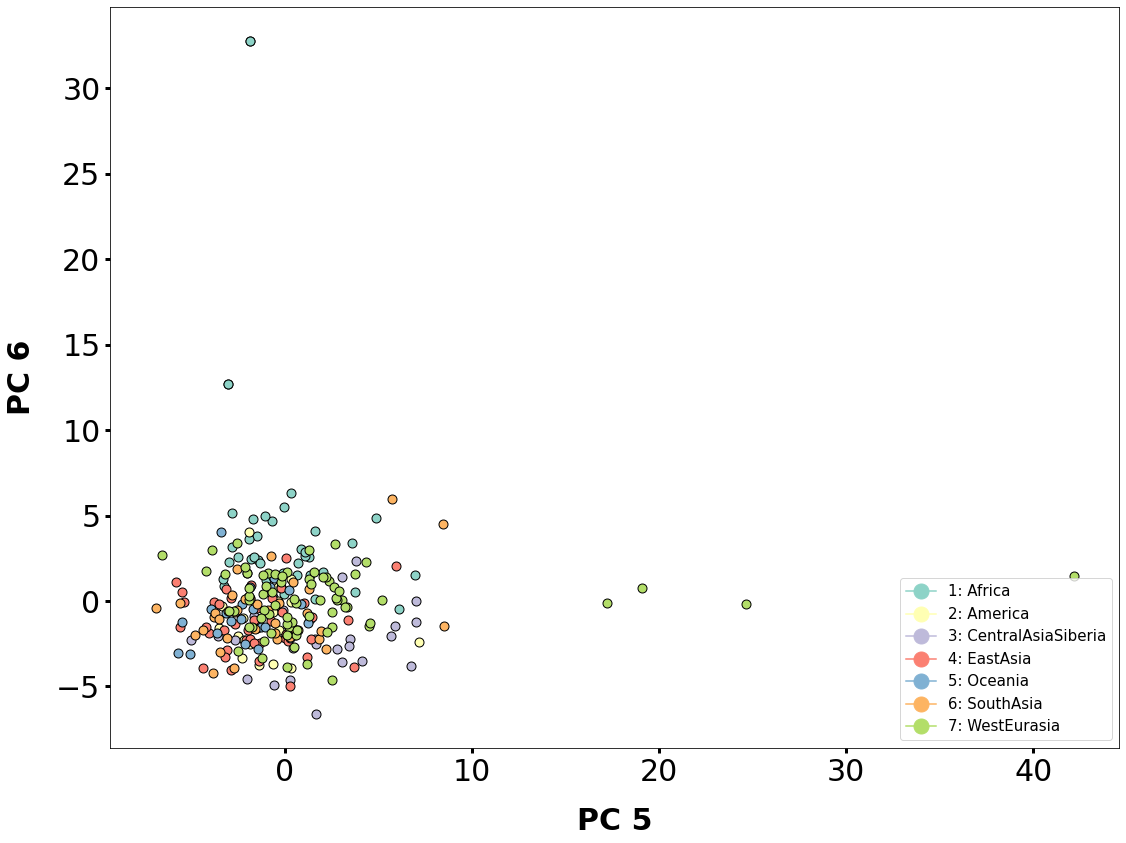

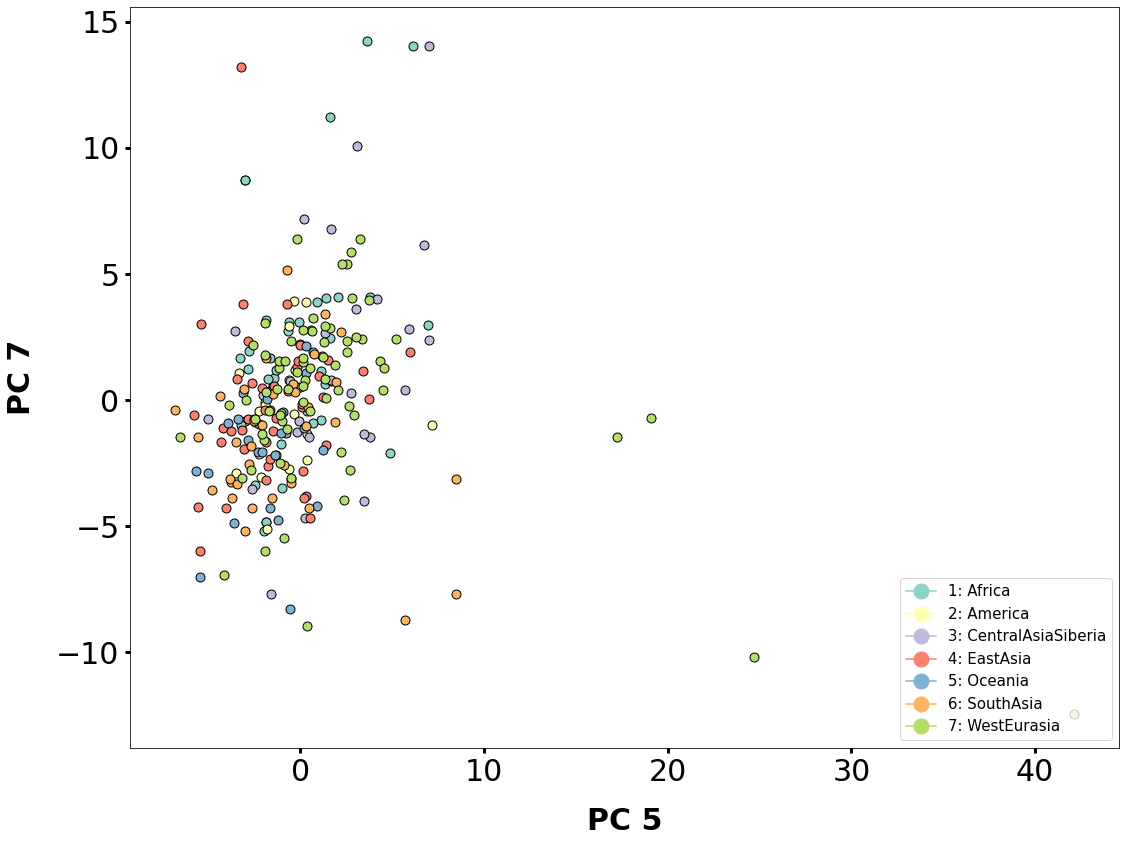

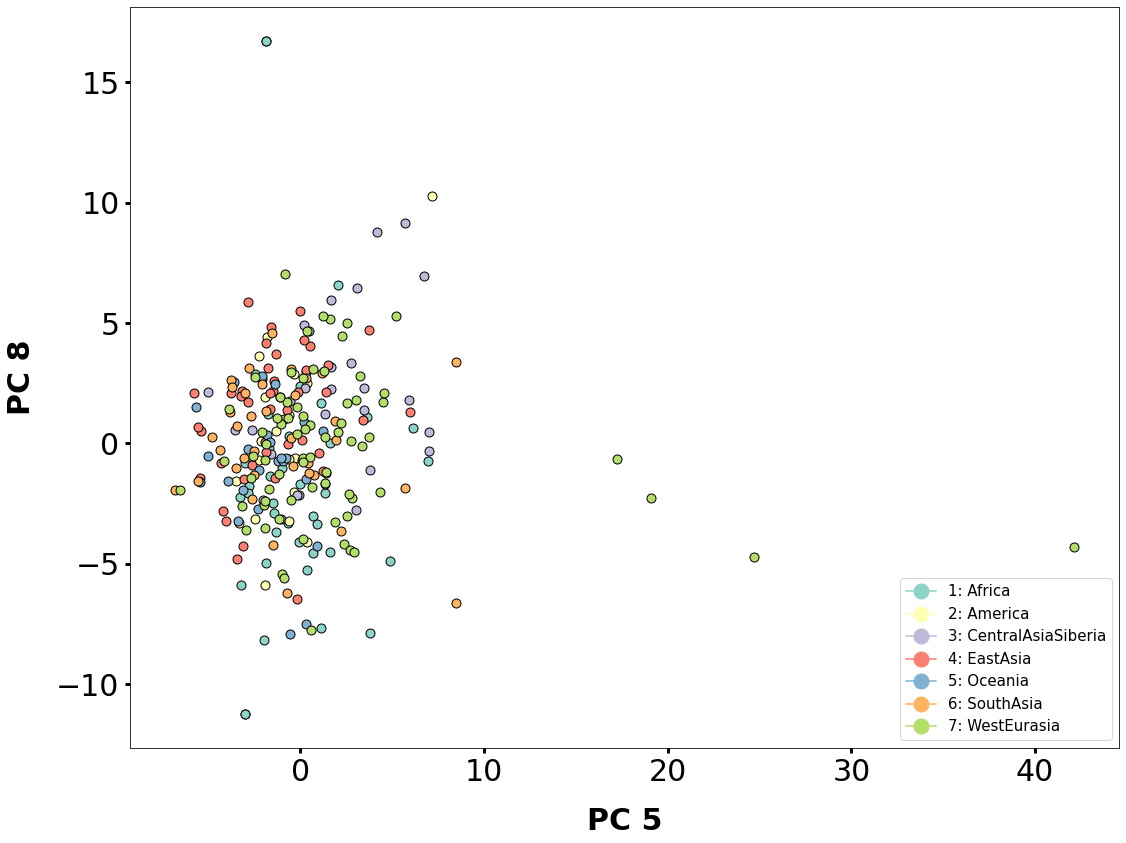

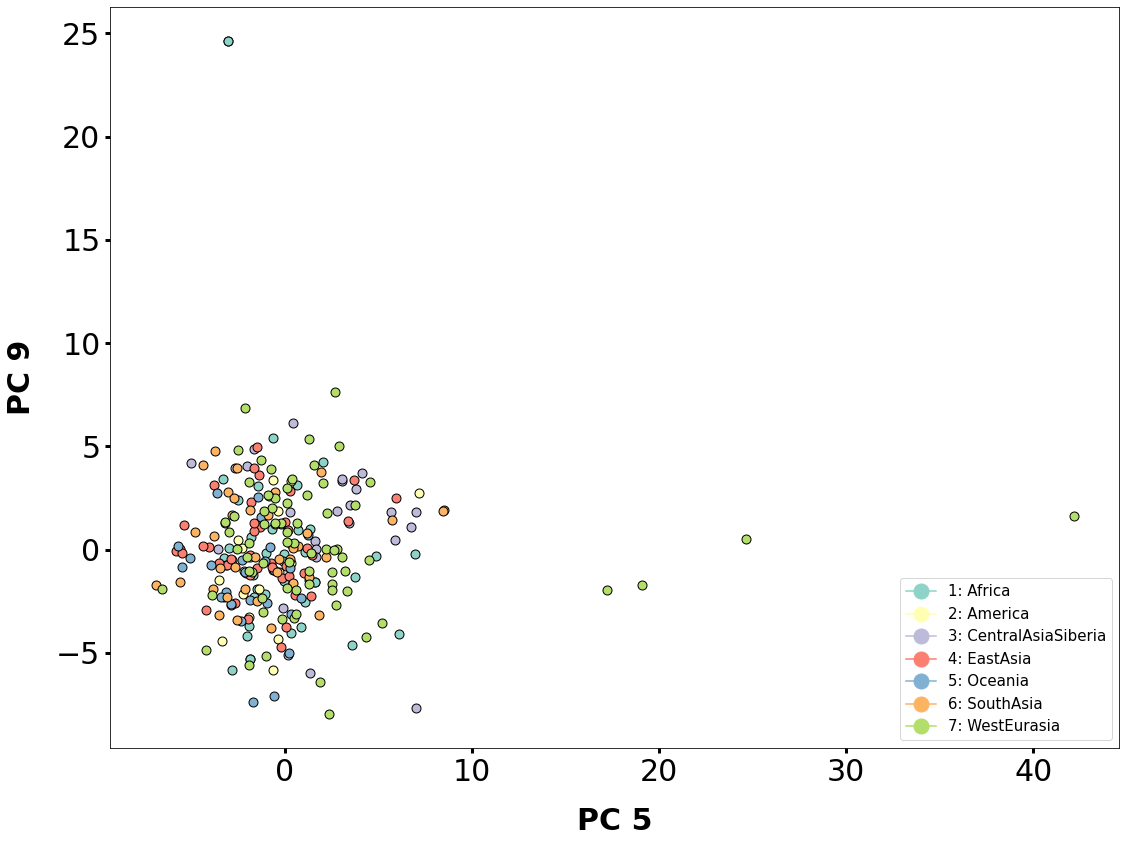

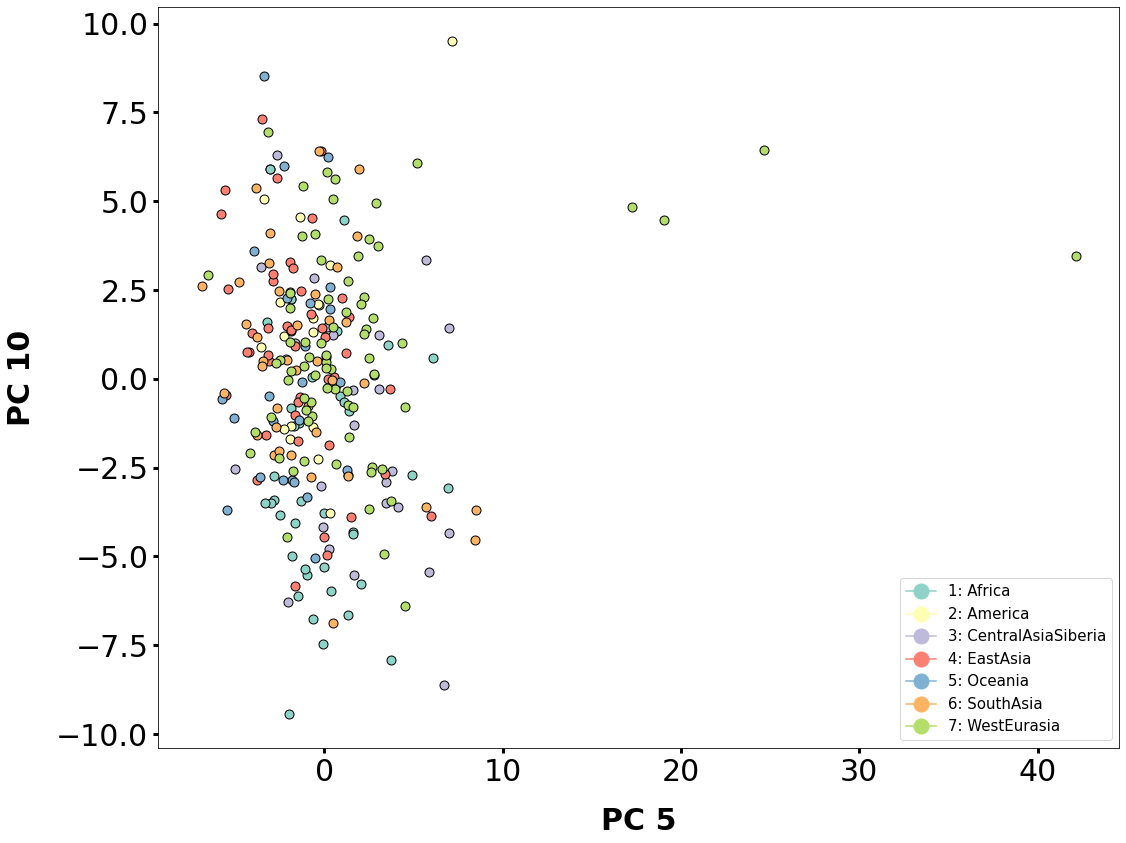

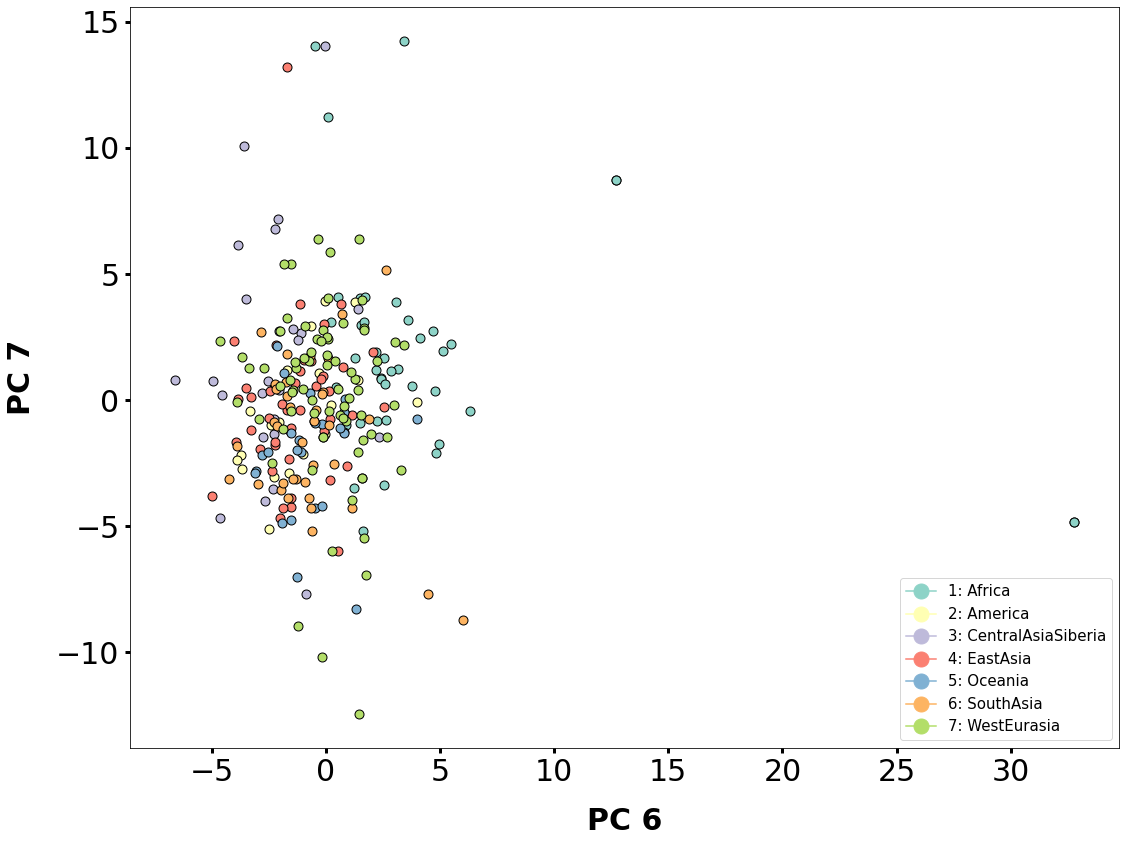

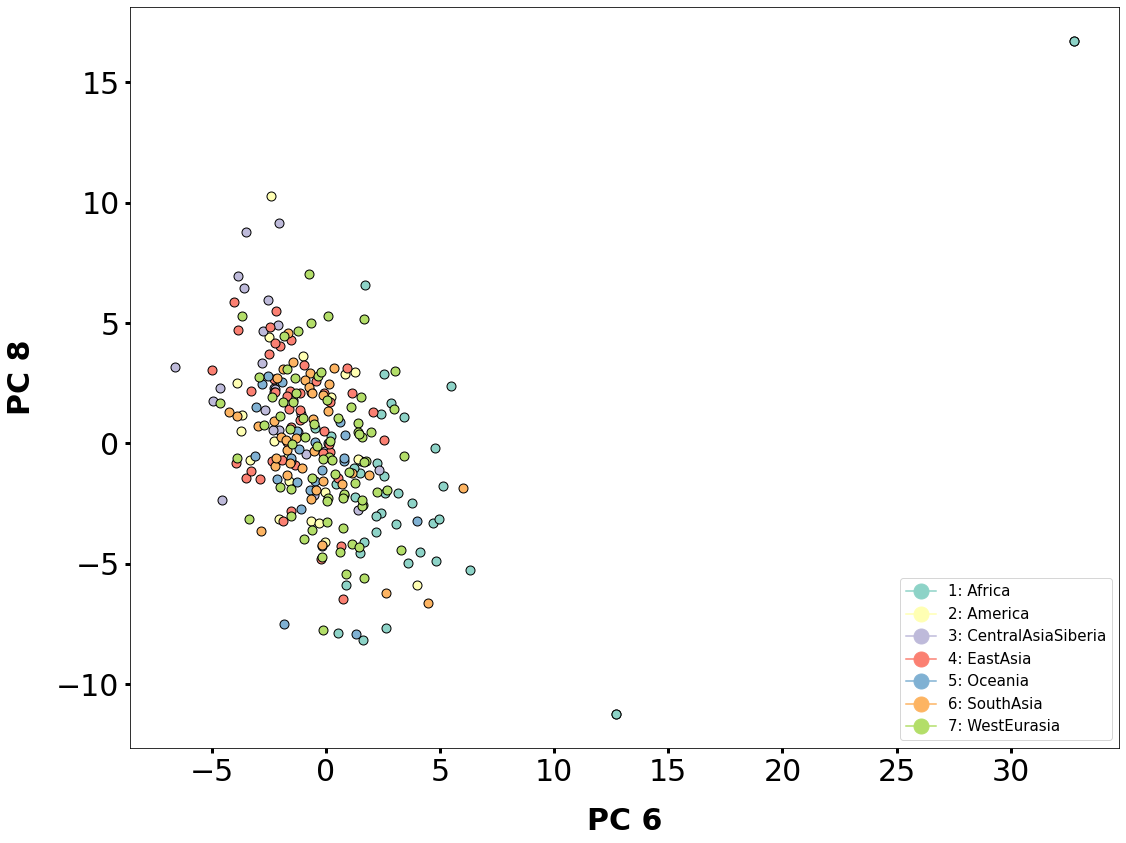

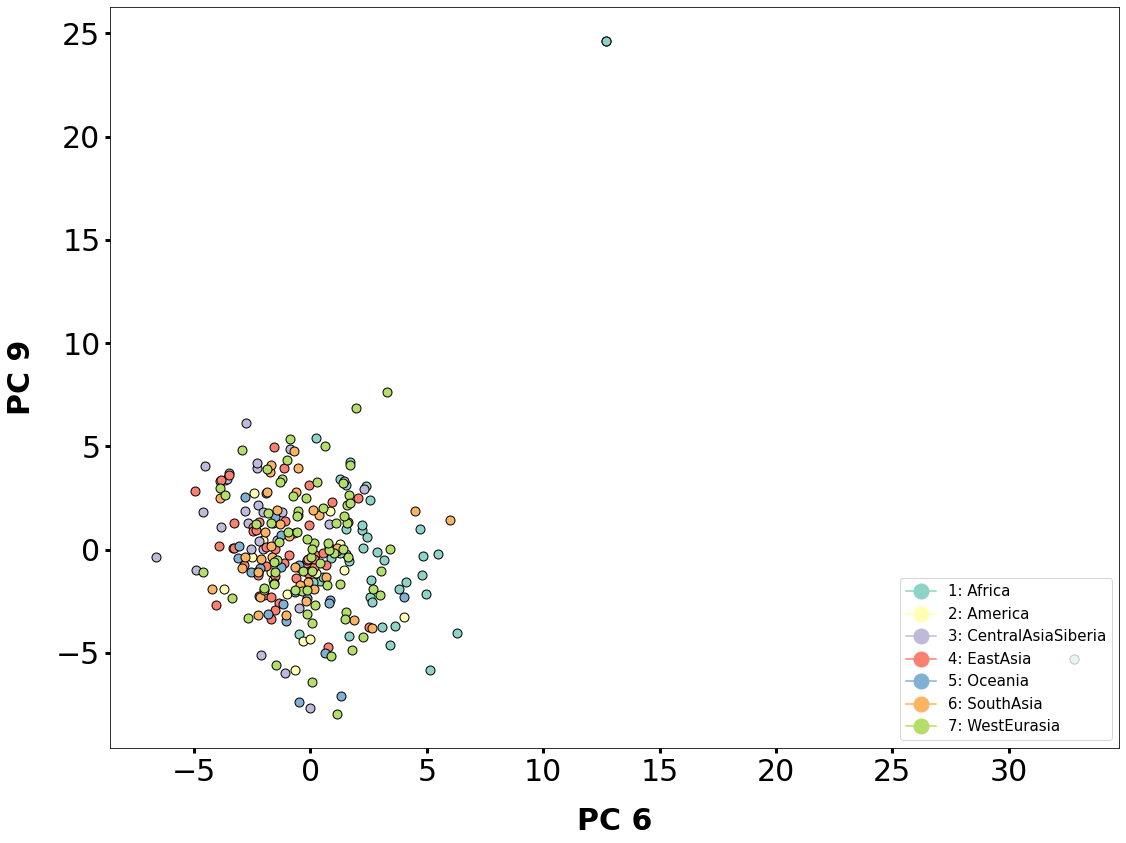

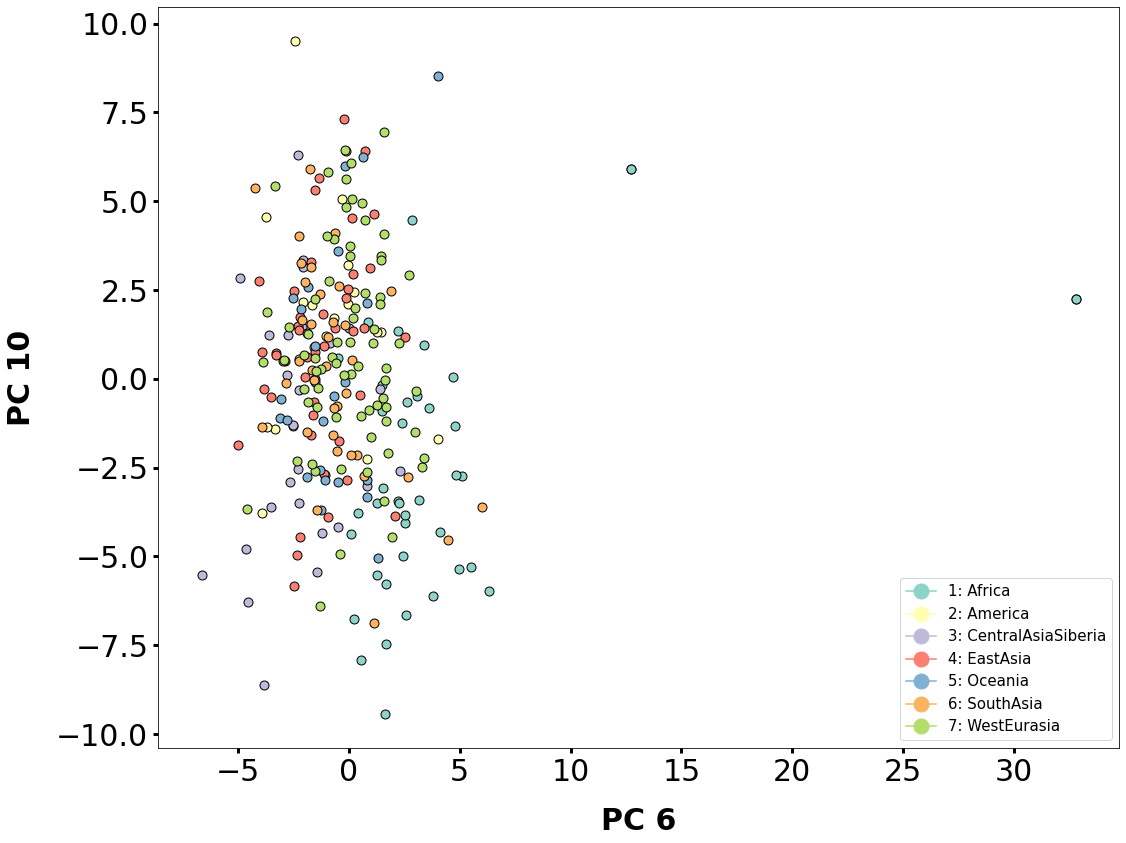

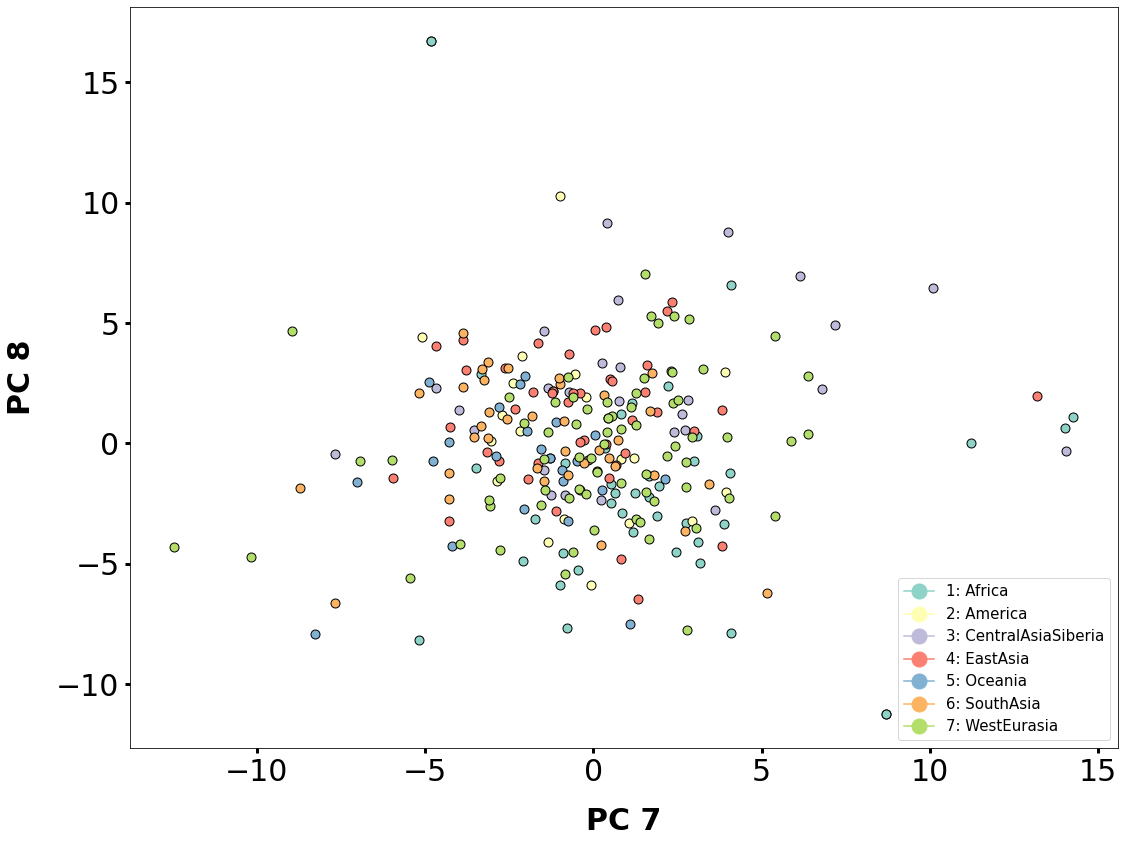

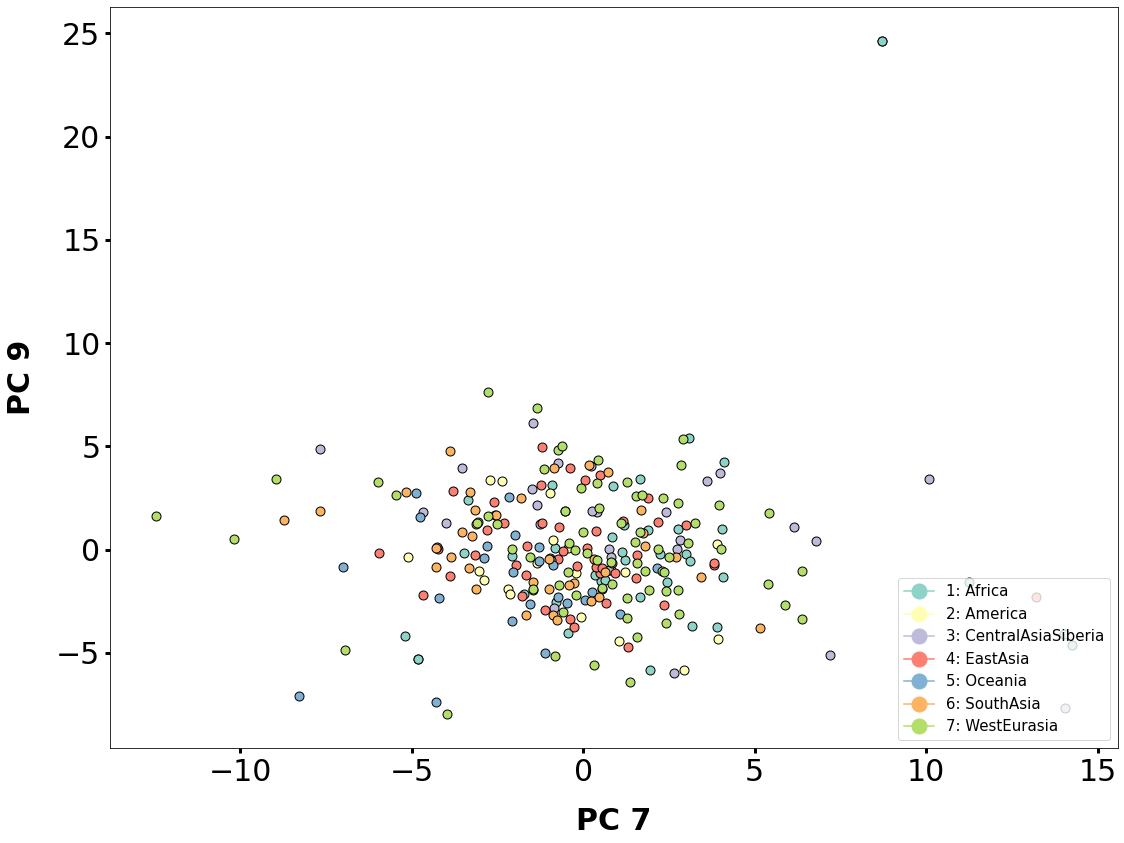

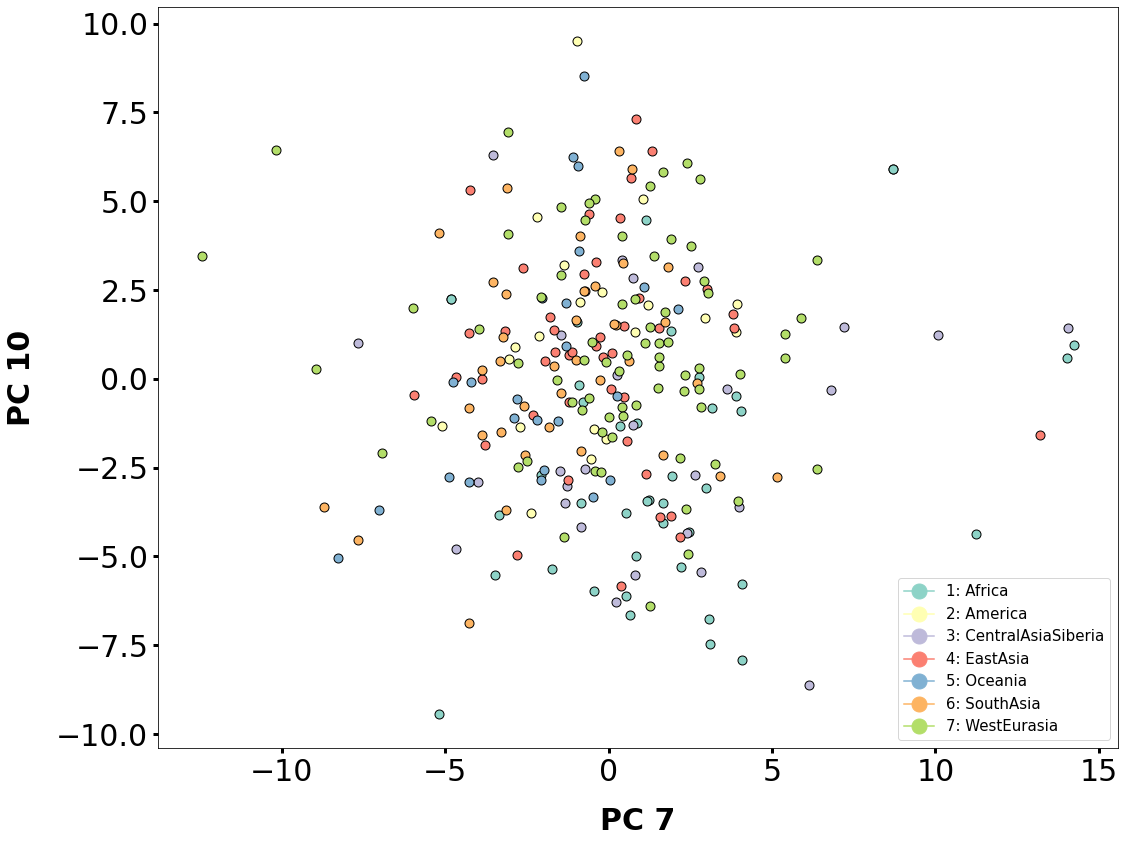

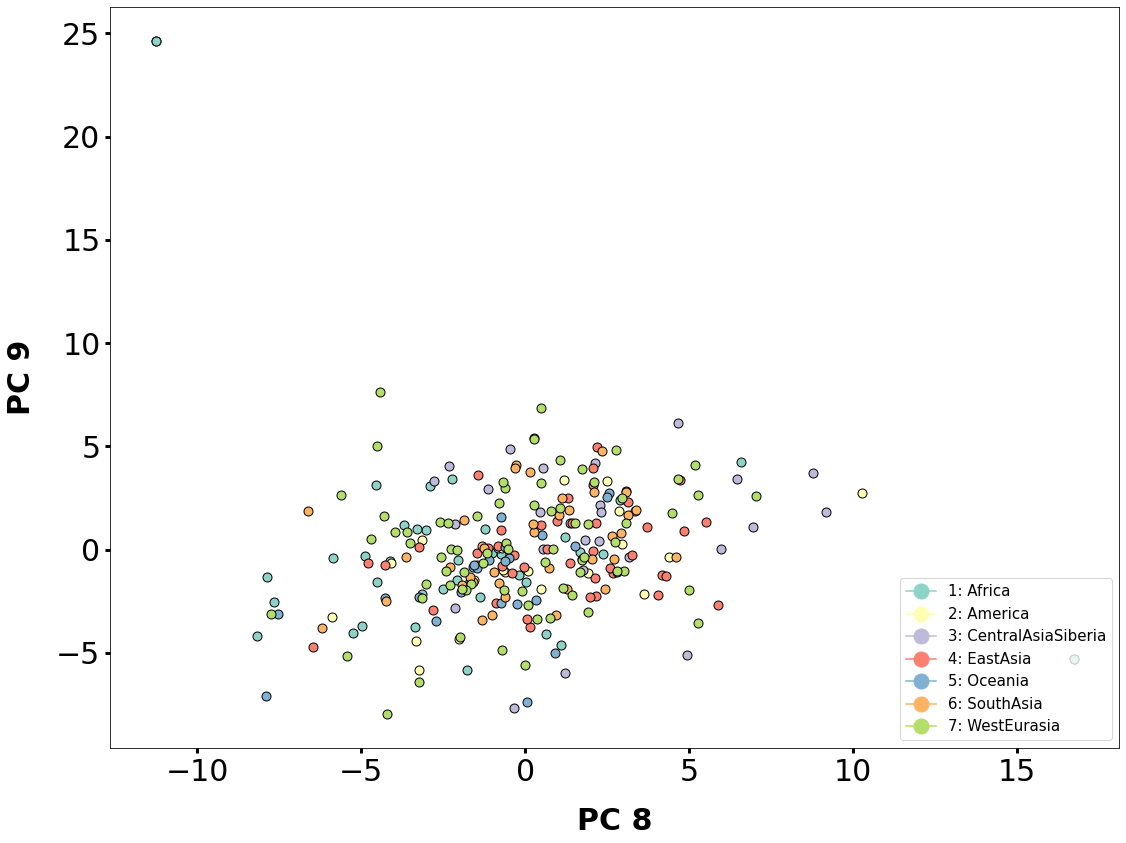

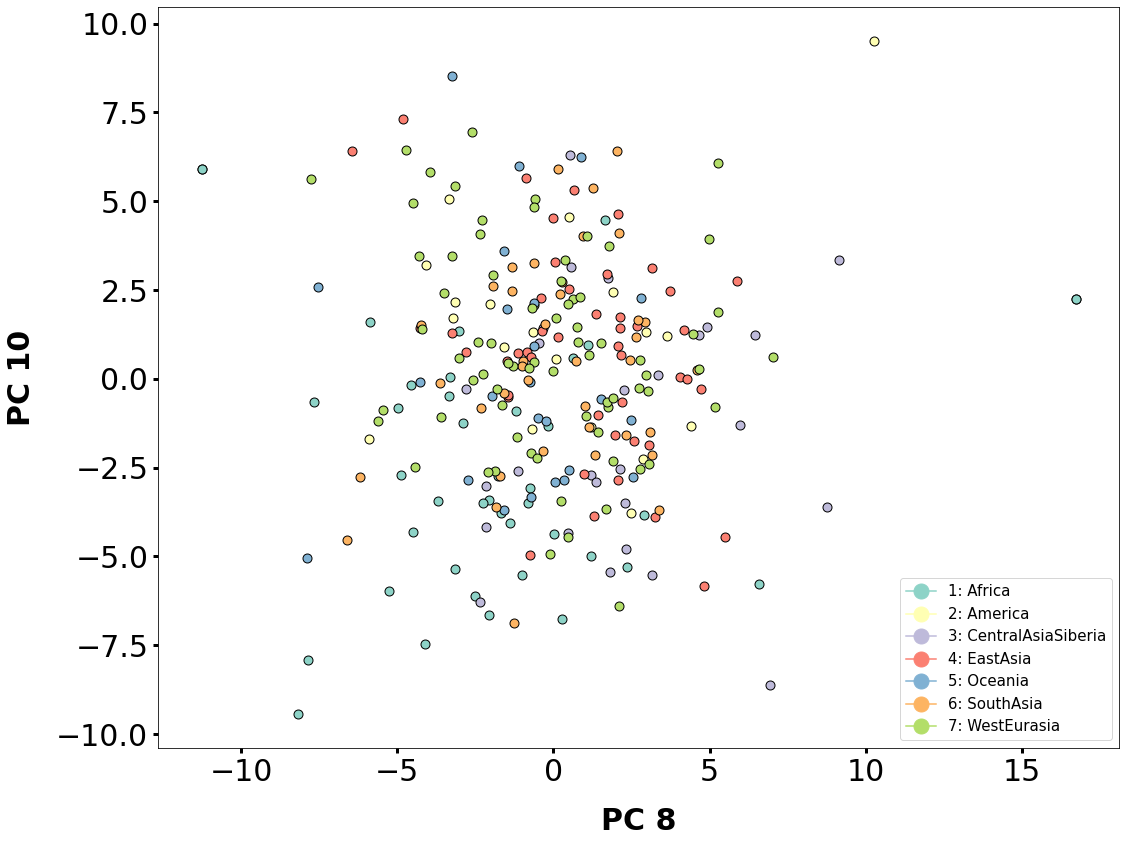

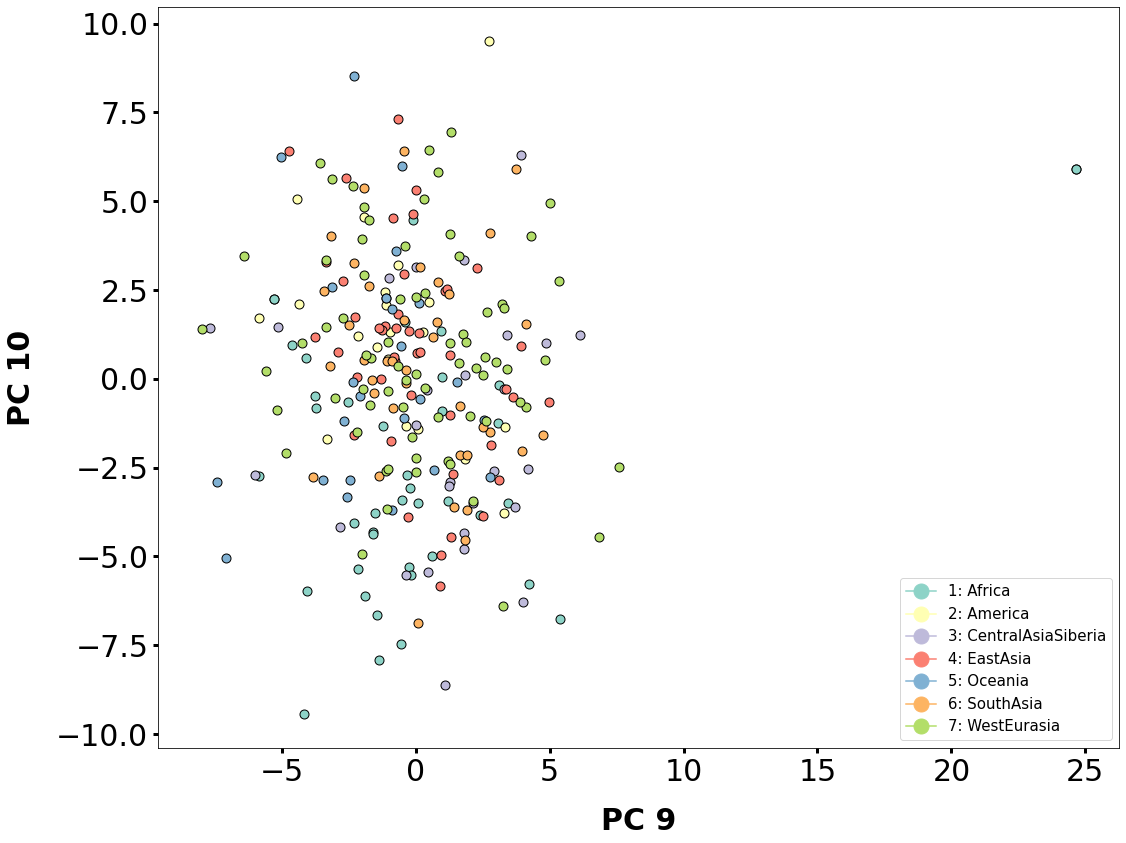

In [20]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='REGION', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))
#    plot_scatter_cluster(data=df_pca, abscissa='component_8', ordinate='component_9', label_horizontal='Component 1', label_vertical='Component 3', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    

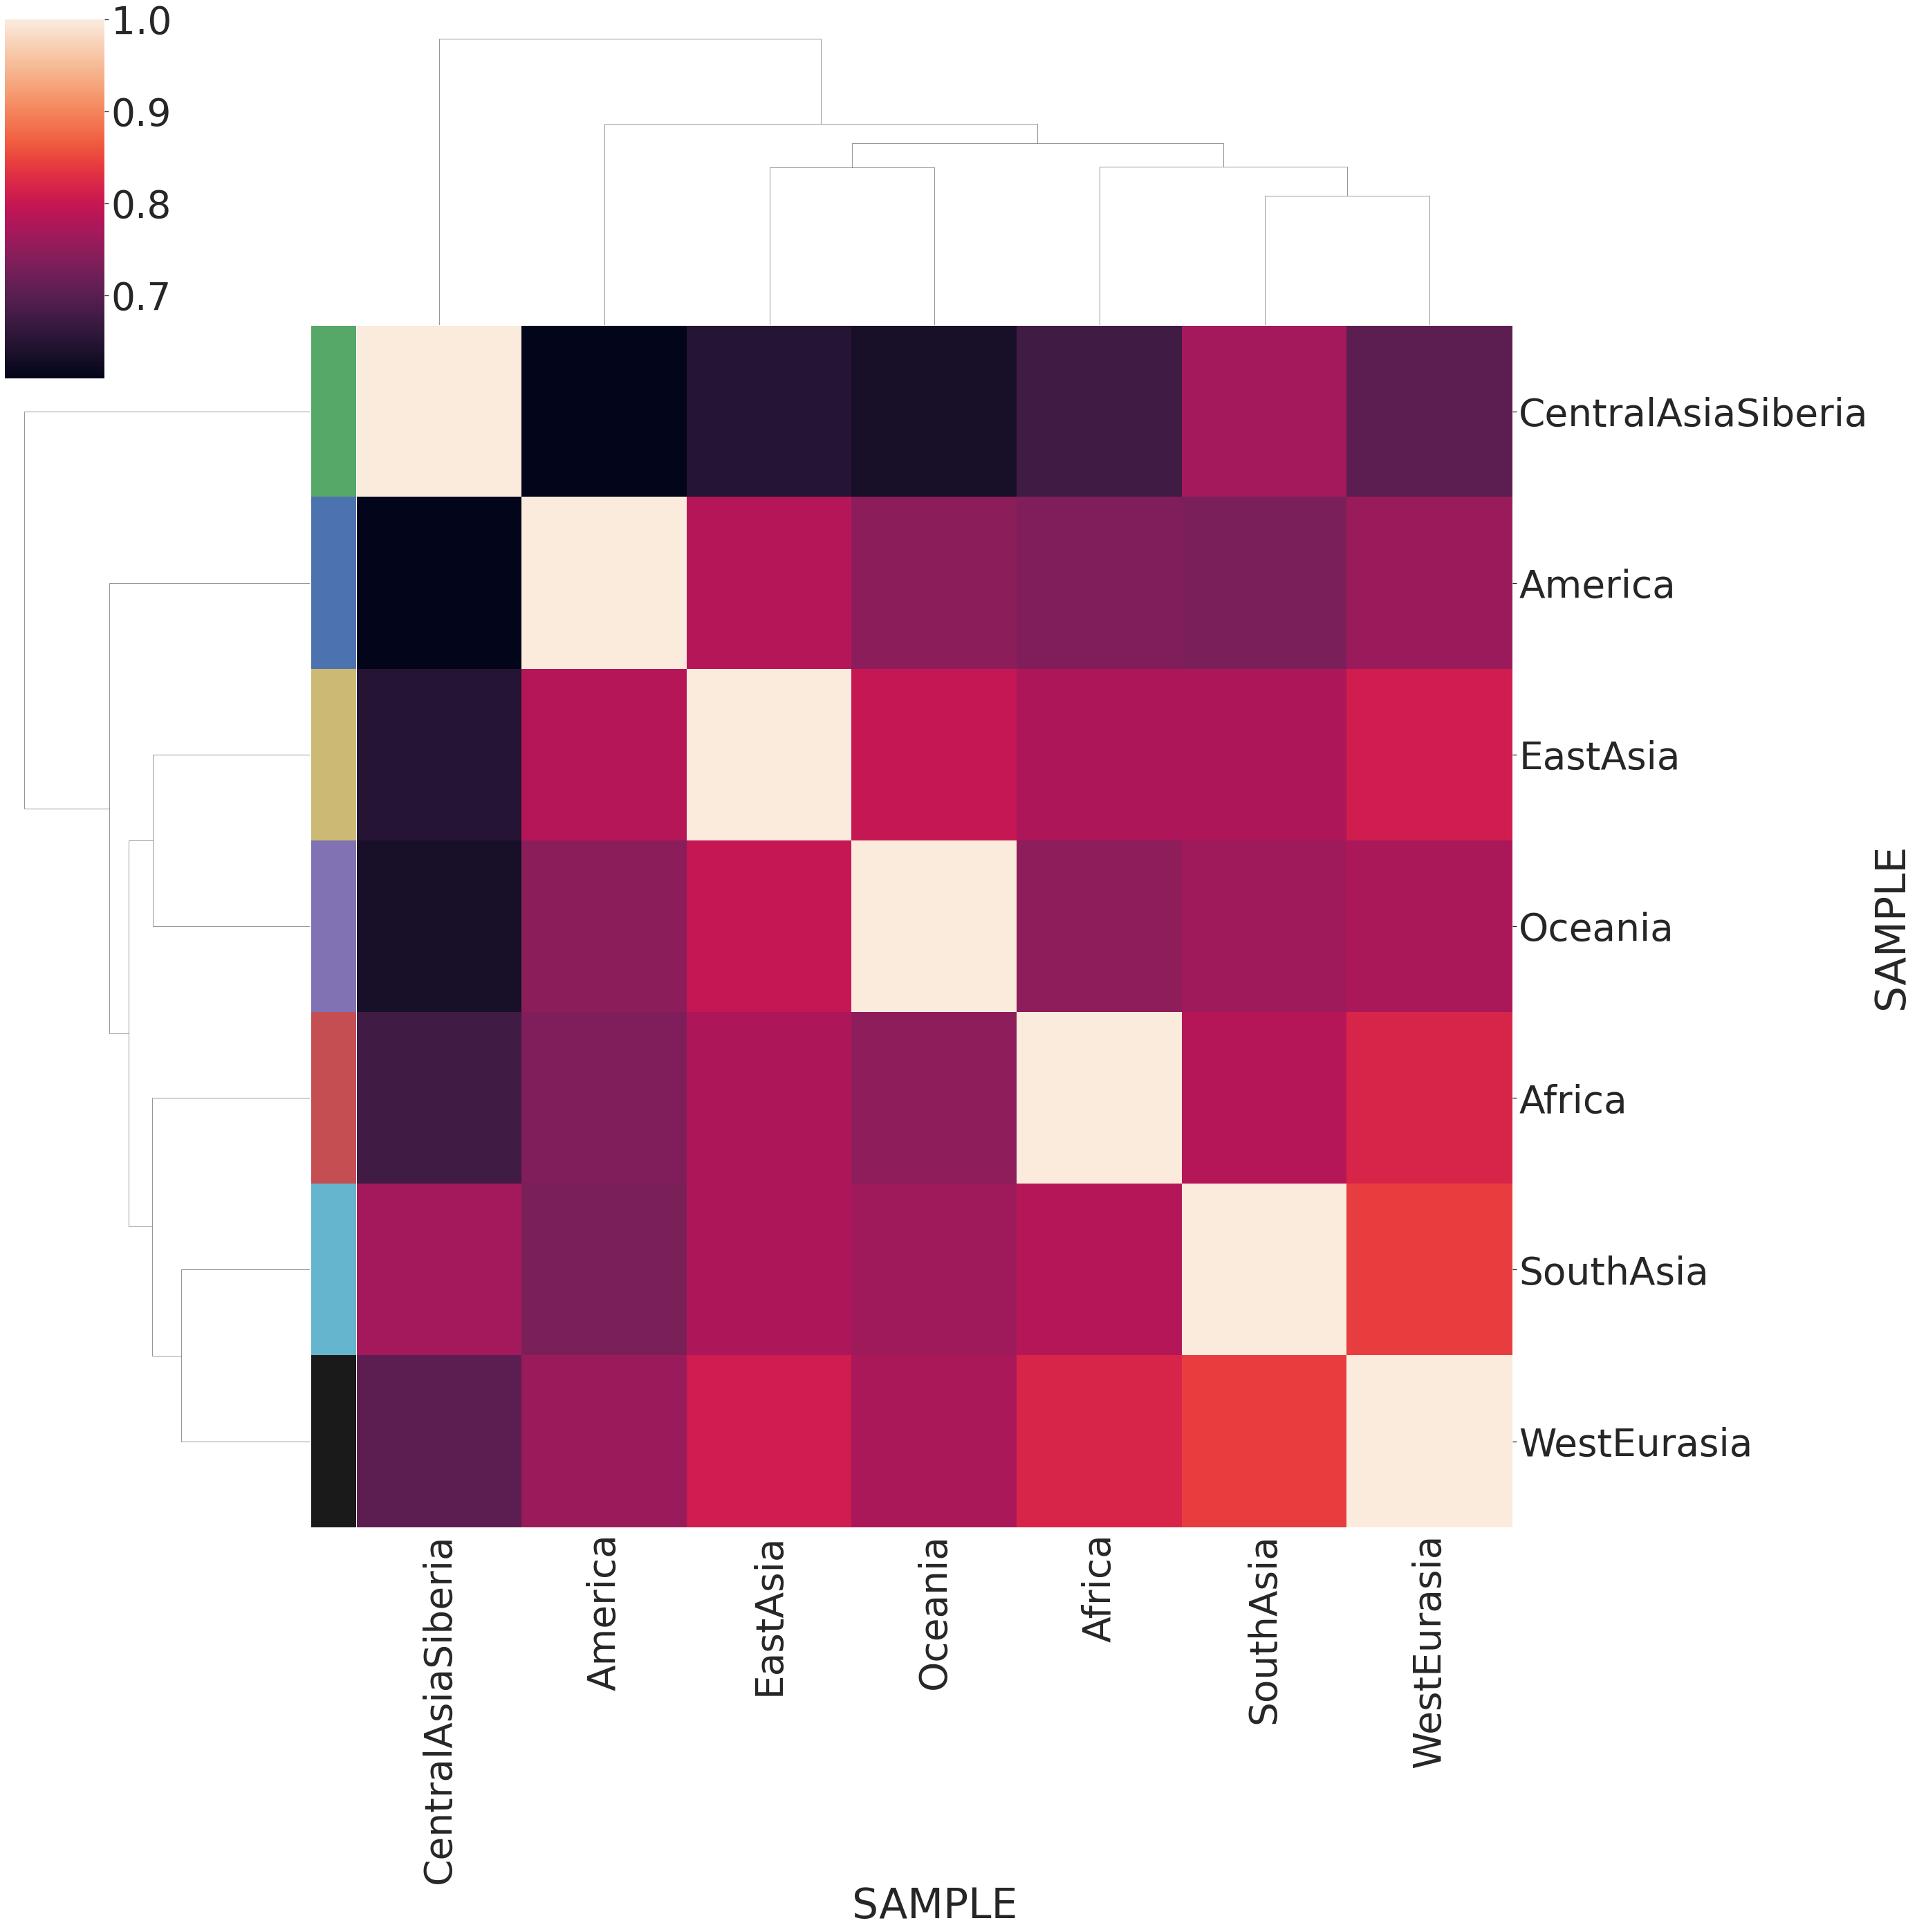

In [21]:
freq = final_cnv.iloc[:,3:283]
freq_input = freq.rename(columns=features['REGION'])
df = freq_input.T
#df = df.reset_index()

#df.groupby('SAMPLE').count().div(df.groupby('SAMPLE').size(),0)


df = df.notnull().groupby(level=0).mean()

df = df.T

lut = dict(zip(df.columns.unique(), "rbgymck"))
lut

seaborn.set(font_scale=5)
corrmatrix = df.corr(method='spearman')
row_colors = df.columns.map(lut)
seaborn.clustermap(corrmatrix, row_colors=row_colors, row_cluster=True, figsize=(40,40))
#plt.savefig('clustermap_regions.pdf')

In [46]:
feature_table = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('/branchinecta/jbazanwilliamson/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [47]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
chm13_gene_anotation


# feature                   class         assembly     assembly_unit  \
0           gene          protein_coding  GCF_009914755.1  Primary Assembly   
1           mRNA                     NaN  GCF_009914755.1  Primary Assembly   
2            CDS            with_protein  GCF_009914755.1  Primary Assembly   
3           gene                  lncRNA  GCF_009914755.1  Primary Assembly   
4          ncRNA                  lncRNA  GCF_009914755.1  Primary Assembly   
...          ...                     ...              ...               ...   
236307      gene          protein_coding  GCF_009914755.1  Primary Assembly   
236308      mRNA                     NaN  GCF_009914755.1  Primary Assembly   
236309       CDS            with_protein  GCF_009914755.1  Primary Assembly   
236310      gene  transcribed_pseudogene  GCF_009914755.1  Primary Assembly   
236311  misc_RNA                     NaN  GCF_009914755.1  Primary Assembly   

          seq_type chromosome genomic_accession     start       end strand  \
0       chromosome          1       NC_060925.1     11134     37628      -   
1       chromosome          1       NC_060925.1     11134     37628      -   
2       chromosome          1       NC_060925.1     13463     37628      -   
3       chromosome          1       NC_060925.1     20892     23710      -   
4       chromosome          1       NC_060925.1     20892     23710      -   
...            ...        ...               ...       ...       ...    ...   
236307  chromosome          Y       NC_060948.1  62446549  62449392      +   
236308  chromosome          Y       NC_060948.1  62446549  62449392      +   
236309  chromosome          Y       NC_060948.1  62446549  62449100      +   
236310  chromosome          Y       NC_060948.1  62449384  62451910      -   
236311  chromosome          Y       NC_060948.1  62449384  62451910      -   

        ... Sequence-Name       Sequence-Role Assigned-Molecule  \
0       ...             1  assembled-molecule                 1   
1       ...             1  assembled-molecule                 1   
2       ...             1  assembled-molecule                 1   
3       ...             1  assembled-molecule                 1   
4       ...             1  assembled-molecule                 1   
...     ...           ...                 ...               ...   
236307  ...             Y  assembled-molecule                 Y   
236308  ...             Y  assembled-molecule                 Y   
236309  ...             Y  assembled-molecule                 Y   
236310  ...             Y  assembled-molecule                 Y   
236311  ...             Y  assembled-molecule                 Y   

       Assigned-Molecule-Location/Type GenBank-Accn  Relationship  \
0                           Chromosome   CP068277.2             =   
1                           Chromosome   CP068277.2             =   
2                           Chromosome   CP068277.2             =   
3                           Chromosome   CP068277.2             =   
4                           Chromosome   CP068277.2             =   
...                                ...          ...           ...   
236307                      Chromosome   CP086569.2             =   
236308                      Chromosome   CP086569.2             =   
236309                      Chromosome   CP086569.2             =   
236310                      Chromosome   CP086569.2             =   
236311                      Chromosome   CP086569.2             =   

        RefSeq-Accn     Assembly-Unit  Sequence-Length UCSC-style-name  
0       NC_060925.1  Primary Assembly        248387328              na  
1       NC_060925.1  Primary Assembly        248387328              na  
2       NC_060925.1  Primary Assembly        248387328              na  
3       NC_060925.1  Primary Assembly        248387328              na  
4       NC_060925.1  Primary Assembly        248387328              na  
...             ...               ...            

<h1> Phylo

In [49]:
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceMatrix
from scipy.spatial.distance import pdist, squareform
import scipy.stats

a = scipy.stats.zscore(counts, axis=1)
distances = pdist(np.array(a), metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix.shape

dist_matrix

name =  list(counts.index)
matrix = dist_matrix
dist_matrix

array([[ 0.        , 61.7586102 , 59.97977364, ..., 43.71434175,
        64.30611695, 43.27677971],
       [61.7586102 ,  0.        , 39.80170135, ..., 61.01180382,
        43.42342429, 63.34235705],
       [59.97977364, 39.80170135,  0.        , ..., 60.53128602,
        43.25351629, 61.75839062],
       ...,
       [43.71434175, 61.01180382, 60.53128602, ...,  0.        ,
        57.40194539, 41.84723944],
       [64.30611695, 43.42342429, 43.25351629, ..., 57.40194539,
         0.        , 60.05437403],
       [43.27677971, 63.34235705, 61.75839062, ..., 41.84723944,
        60.05437403,  0.        ]])

In [50]:
lut = dict(zip(features['REGION'].unique(), "rbgymck"))

row_colors = features['REGION'].map(lut)
row_color = row_colors.to_dict()
lut

features

REGION           COUNTRY
SAMPLE                                          
LP6005441-DNA_A01  WestEurasia  Russia(Caucasus)
LP6005441-DNA_A03      Oceania    PapuaNewGuinea
LP6005441-DNA_A04      America          Colombia
LP6005441-DNA_A05  WestEurasia            France
LP6005441-DNA_A06  WestEurasia    Italy(Bergamo)
...                        ...               ...
LP6007069-DNA_A01  WestEurasia            Greece
SS6004471               Africa             Congo
SS6004477              Oceania         Australia
SS6004478              Oceania         Australia
SS6004480               Africa             Sudan

[269 rows x 2 columns]

In [51]:
from biotite.sequence.phylo import neighbor_joining
#track features for pca & tsne
#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.neighbor_joining(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))


#with open('newick_tree.tree', 'a') as f:
#    f.write(t)


(((((((((((LP6005677-DNA_E01:16.68612289428711,LP6005443-DNA_C07:16.882469177246094):0.5558064579963684,(LP6005441-DNA_C03:18.20403289794922,LP6005441-DNA_B11:17.56969451904297):0.43260258436203003):0.15110456943511963,((LP6005443-DNA_F08:17.000076293945312,LP6005443-DNA_F07:15.838297843933105):0.8409658670425415,(LP6005443-DNA_C02:16.077810287475586,LP6005441-DNA_A01:17.962106704711914):0.32696282863616943):0.2642449140548706):0.09235411137342453,(((((((LP6005592-DNA_G03:19.34238624572754,LP6005442-DNA_E04:14.688619613647461):3.1248538494110107,(LP6005443-DNA_F10:13.62031078338623,LP6005443-DNA_E10:13.353087425231934):1.5609914064407349):1.6097381114959717,LP6005441-DNA_A05:16.0142822265625):0.1839112788438797,((((LP6005443-DNA_D06:15.010952949523926,LP6005443-DNA_D02:15.040234565734863):0.4174541234970093,LP6005441-DNA_E07:15.714553833007812):0.2777799963951111,LP6005441-DNA_G03:15.913132667541504):0.32986021041870117,(LP6005441-DNA_C07:14.645721435546875,LP6005441-DNA_C02:15.6346569

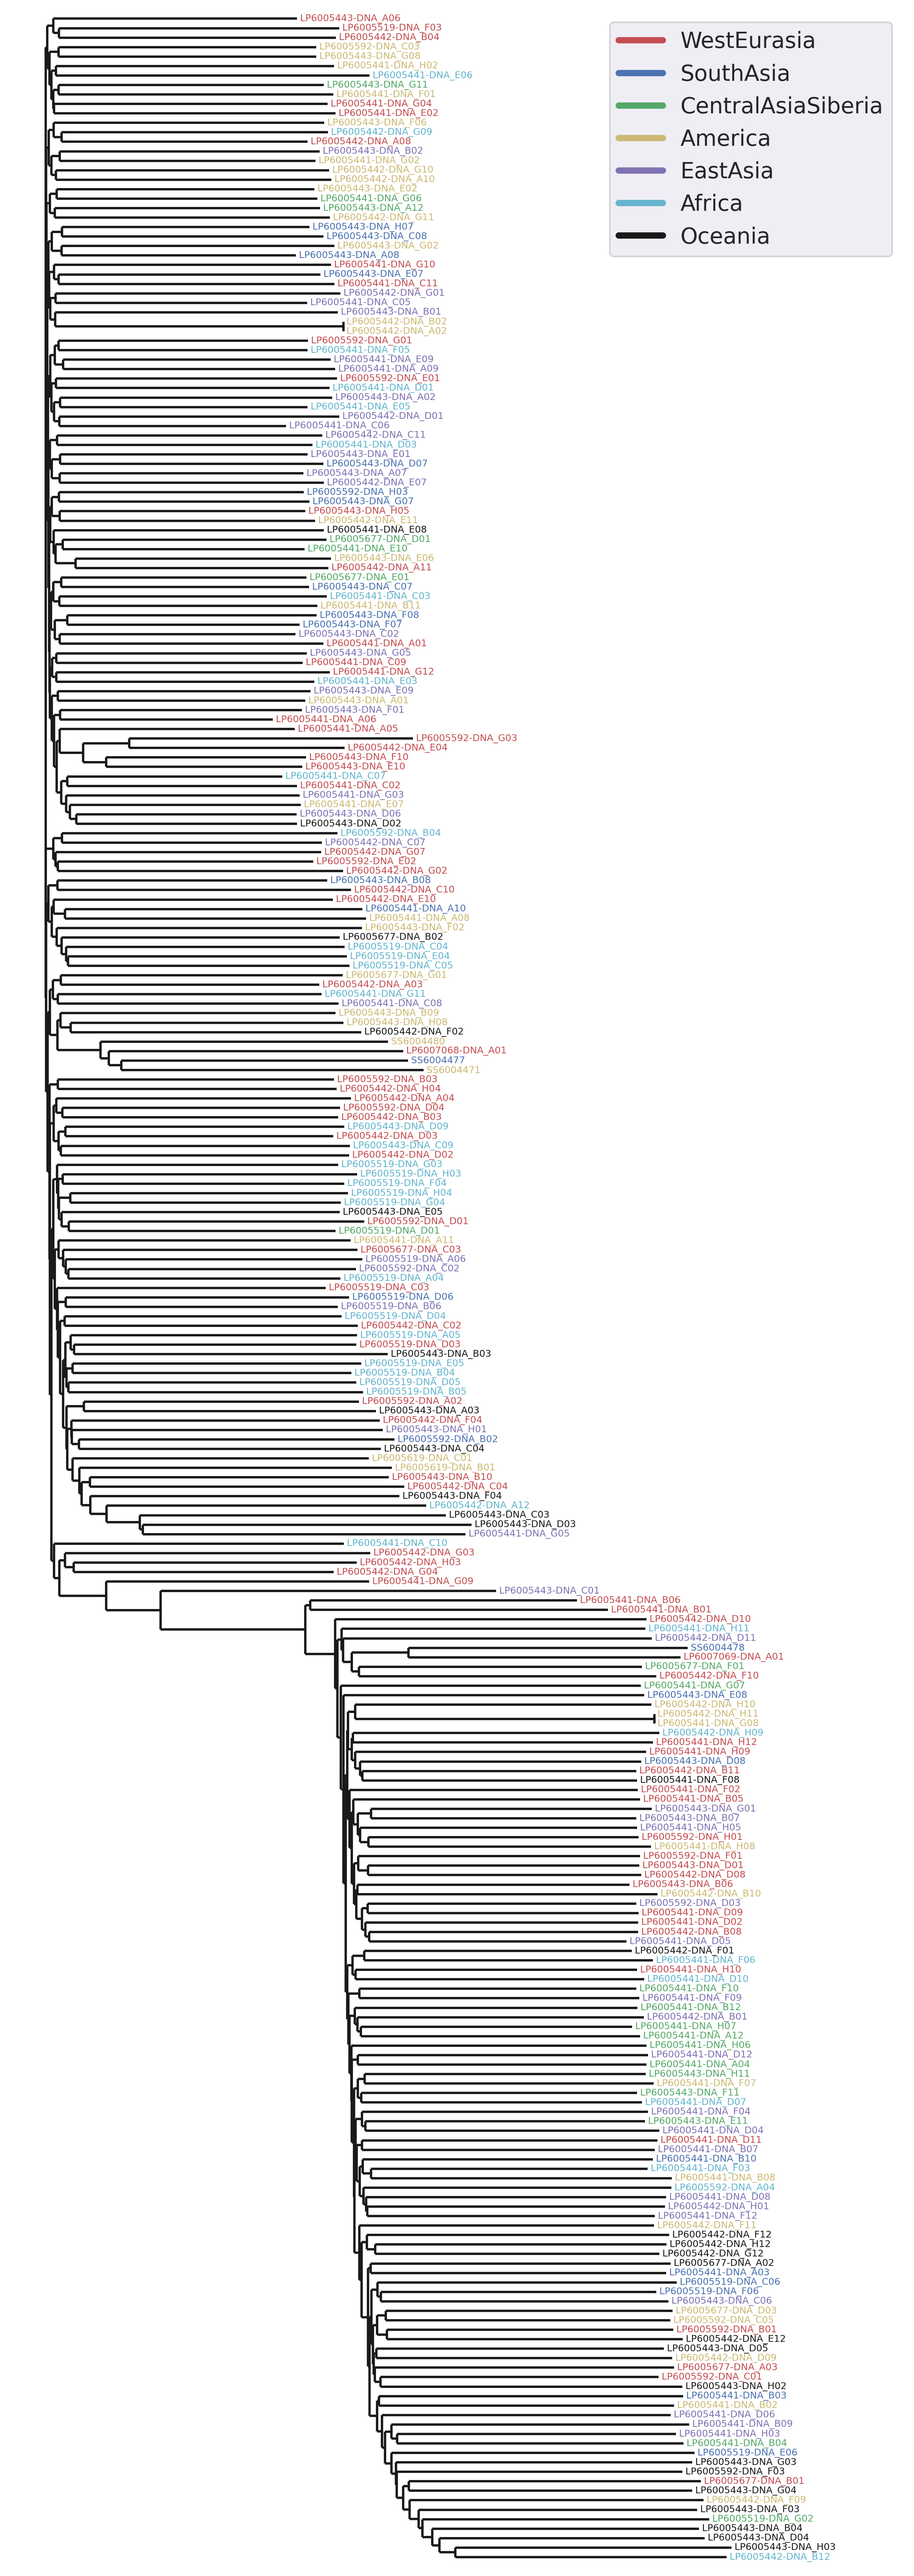

In [52]:
from Bio import Phylo
from io import StringIO 
import pylab
from matplotlib.lines import Line2D

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
    # set the size of the figure
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =0, prop={'size': 14})

#plt.savefig('neighbor-joining-tree_euclidean.png')

In [53]:
from biotite.sequence.phylo import upgma

#features = features.sort_index()

#names.get_indices()
labels = list(counts.index)
#labels = list(features['10-Region'])
tree = biotite.sequence.phylo.upgma(dist_matrix)
t = print(tree.to_newick(labels=labels, include_distance=True))



(((((((SS6004480:19.553359985351562,LP6007068-DNA_A01:19.553359985351562):1.2152862548828125,(SS6004477:20.062000274658203,SS6004471:20.062000274658203):0.7066459655761719):1.174489974975586,(((((((((((((((((((((((((((((((((((((((LP6005677-DNA_G01:19.073272705078125,LP6005443-DNA_G02:19.073272705078125):0.1815776824951172,((((((((((((((((((((((((((((((((((((((((((((((((((LP6005677-DNA_E01:16.7842960357666,LP6005443-DNA_C07:16.7842960357666):0.37561798095703125,(((LP6005443-DNA_H05:16.962238311767578,((((((((LP6005443-DNA_F10:13.486699104309082,LP6005443-DNA_E10:13.486699104309082):2.48500919342041,LP6005441-DNA_A05:15.971708297729492):0.18128395080566406,(((LP6005443-DNA_D06:15.025593757629395,LP6005443-DNA_D02:15.025593757629395):0.5532073974609375,LP6005441-DNA_E07:15.578801155090332):0.2548379898071289,(LP6005441-DNA_G03:15.70185375213623,((LP6005441-DNA_C07:14.738106727600098,LP6005441-DNA_A06:14.738106727600098):0.4993619918823242,LP6005441-DNA_C02:15.237468719482422):0.4643850326

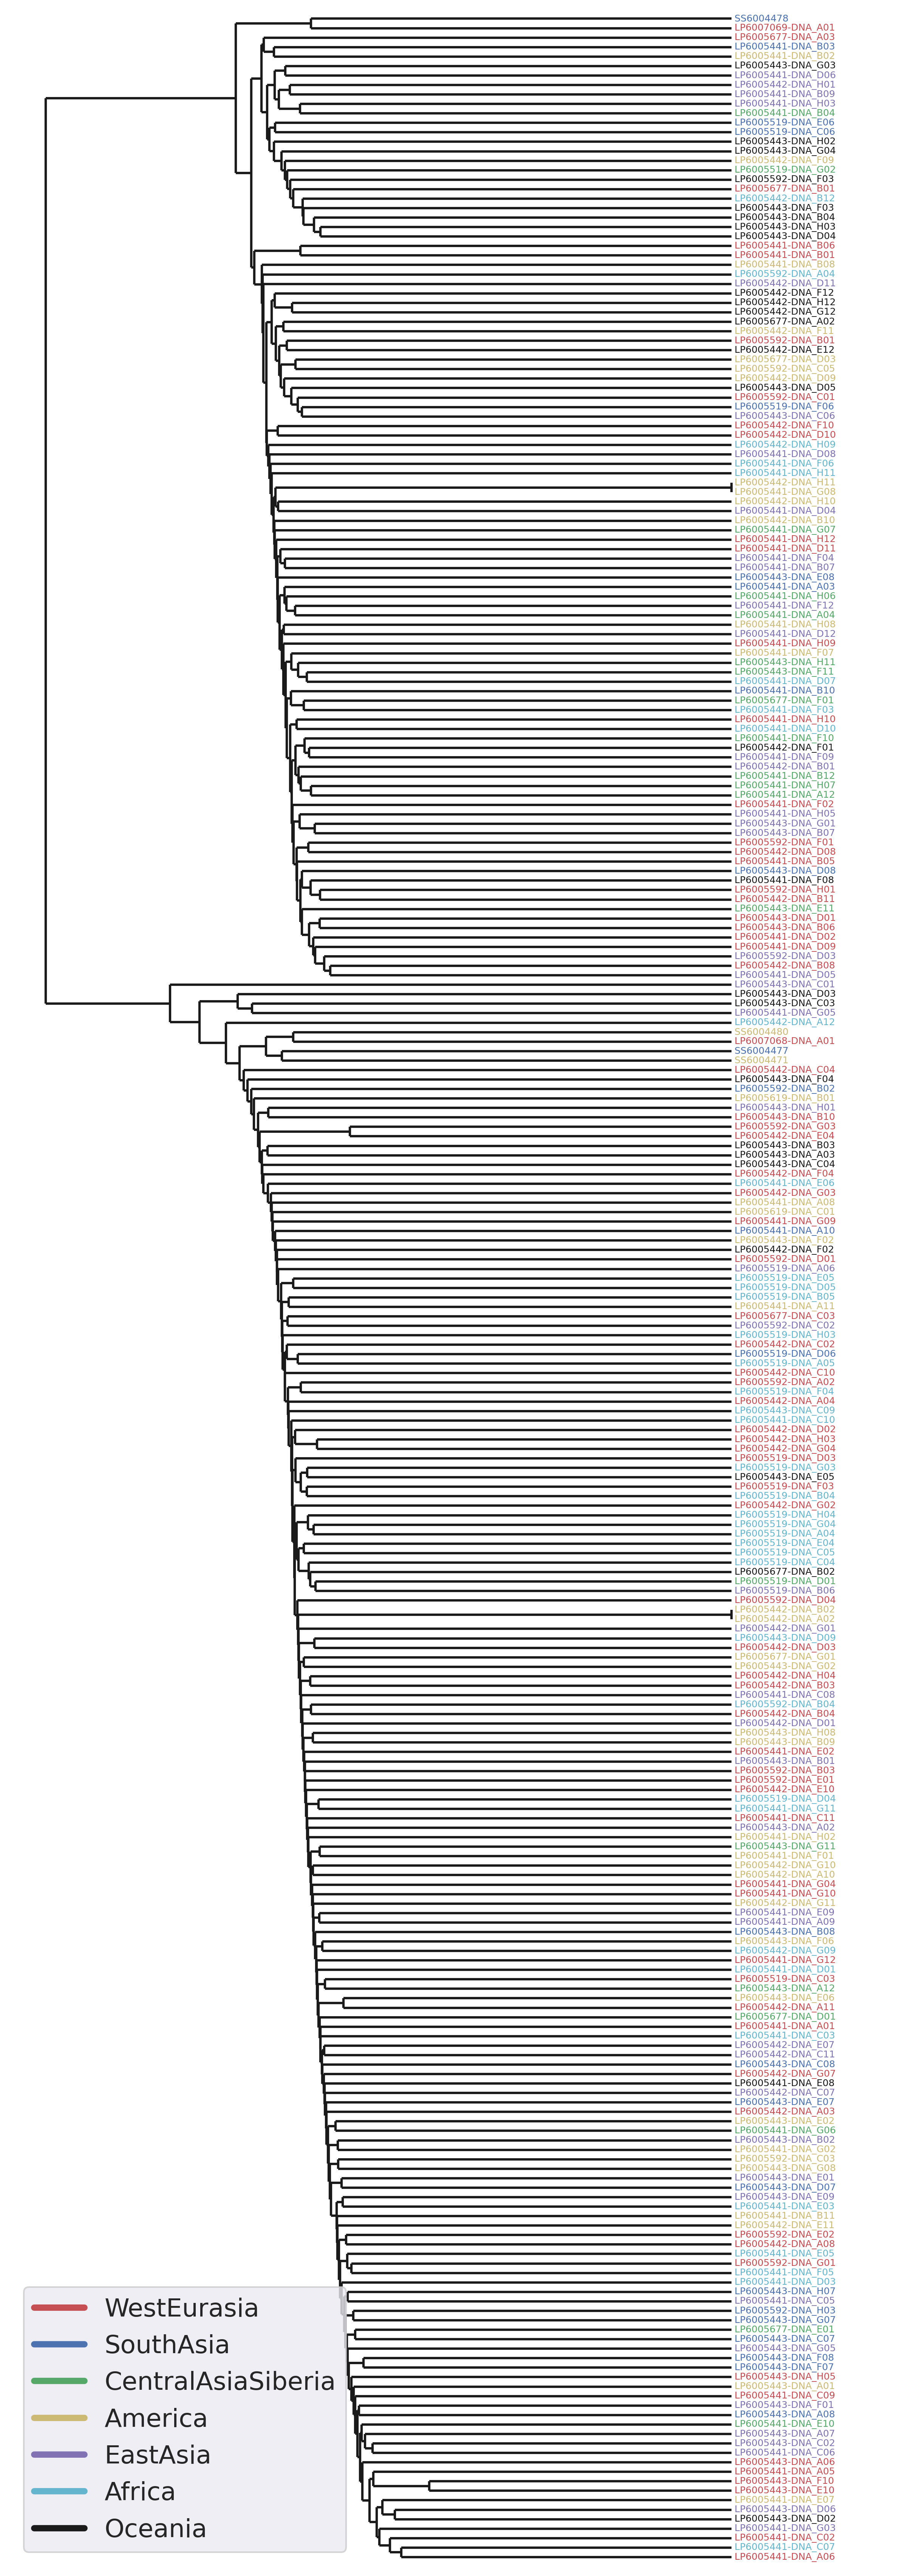

In [54]:
from Bio import Phylo
from io import StringIO 
from matplotlib.lines import Line2D
import pylab

handle = StringIO(str(tree.to_newick(labels=labels, include_distance=True)))
tree_2 = Phylo.read(handle, "newick")
tree_2.ladderize()

matplotlib.rc('font', size=6)
#matplotlib.rc('font', size=6)
    # set the size of the figure
#fig = plt.figure(figsize=(20, 80), dpi=300)
fig = plt.figure(figsize=(10, 70), dpi=300)
    # alternatively
    # fig.set_size_inches(10, 40)
axes = fig.add_subplot(3, 1, 1)
fig.tight_layout()
Phylo.draw(tree_2, 
           axes=axes, 
           do_show=False,
           label_colors= row_color)
pylab.axis('off')

### CUSTOM LEGEND
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='y', lw=4),
                Line2D([0], [0], color='m', lw=4),
                Line2D([0], [0], color='c', lw=4),
                Line2D([0], [0], color='k', lw=4)]

#fig, ax = plt.subplots()
plt.legend(custom_lines, ['WestEurasia', 'SouthAsia', 'CentralAsiaSiberia', 'America', 'EastAsia', 'Africa','Oceania'],  loc =3, prop={'size': 16})

#plt.savefig('upgma-tree_euclidean.png')
#plt.legend(row_color, loc ="upper left")
#plt.savefig('upgma-tree.pdf')
#Phylo.write(tree_2, "egfr-family-annotated.xml", "phyloxml")